# **Import and clean data**

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

amex = pd.read_csv("amex-listings.csv", parse_dates=['IPO Year', 'Last Update'])
display(amex.head(10))
display(amex.info())


,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Last Update
0,XXII,"22nd Century Group, Inc",1.33,"120,628,490.30",NaT,Consumer Non-Durables,Farming/Seeds/Milling,2017-04-26
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.00,"1,266,332,595.00",1986-01-01,NaN,NaN,2017-04-25
2,IAF,Aberdeen Australia Equity Fund Inc,6.15,"139,865,304.90",NaT,NaN,NaN,2017-04-23
3,CH,"Aberdeen Chile Fund, Inc.",7.22,"67,563,457.57",NaT,NaN,NaN,2017-04-26
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.36,"128,842,971.60",NaT,NaN,NaN,2017-04-25
5,FCO,"Aberdeen Global Income Fund, Inc.",8.62,"75,376,107.36",1992-01-01,NaN,NaN,2017-04-25
6,IF,"Aberdeen Indonesia Fund, Inc.",7.33,"68,200,145.64",1990-01-01,NaN,NaN,2017-04-26
7,ISL,"Aberdeen Israel Fund, Inc.",17.65,"70,564,682.35",1992-01-01,NaN,NaN,2017-04-23
8,ACU,Acme United Corporation.,27.39,"91,138,992.45",1988-01-01,Capital Goods,Industrial Machinery/Components,2017-04-23
9,AIII,"ACRE Realty Investors, Inc.",1.16,"23,768,939.40",NaT,Consumer Services,Real Estate Investment Trusts,2017-04-25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           360 non-null    object        
 1   Company Name           360 non-null    object        
 2   Last Sale              346 non-null    float64       
 3   Market Capitalization  360 non-null    float64       
 4   IPO Year               105 non-null    datetime64[ns]
 5   Sector                 238 non-null    object        
 6   Industry               238 non-null    object        
 7   Last Update            360 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 22.6+ KB


None

# **Dealing with missing values**



In [ ]:
amex = pd.read_csv('amex-listings.csv', parse_dates=['IPO Year', 'Last Update'], na_values=['n/a',''])
display(amex.head(10))
display(amex.info())

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Last Update
0,XXII,"22nd Century Group, Inc",1.33,"120,628,490.30",NaT,Consumer Non-Durables,Farming/Seeds/Milling,2017-04-26
1,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.00,"1,266,332,595.00",1986-01-01,NaN,NaN,2017-04-25
2,IAF,Aberdeen Australia Equity Fund Inc,6.15,"139,865,304.90",NaT,NaN,NaN,2017-04-23
3,CH,"Aberdeen Chile Fund, Inc.",7.22,"67,563,457.57",NaT,NaN,NaN,2017-04-26
4,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.36,"128,842,971.60",NaT,NaN,NaN,2017-04-25
5,FCO,"Aberdeen Global Income Fund, Inc.",8.62,"75,376,107.36",1992-01-01,NaN,NaN,2017-04-25
6,IF,"Aberdeen Indonesia Fund, Inc.",7.33,"68,200,145.64",1990-01-01,NaN,NaN,2017-04-26
7,ISL,"Aberdeen Israel Fund, Inc.",17.65,"70,564,682.35",1992-01-01,NaN,NaN,2017-04-23
8,ACU,Acme United Corporation.,27.39,"91,138,992.45",1988-01-01,Capital Goods,Industrial Machinery/Components,2017-04-23
9,AIII,"ACRE Realty Investors, Inc.",1.16,"23,768,939.40",NaT,Consumer Services,Real Estate Investment Trusts,2017-04-25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           360 non-null    object        
 1   Company Name           360 non-null    object        
 2   Last Sale              346 non-null    float64       
 3   Market Capitalization  360 non-null    float64       
 4   IPO Year               105 non-null    datetime64[ns]
 5   Sector                 238 non-null    object        
 6   Industry               238 non-null    object        
 7   Last Update            360 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 22.6+ KB


None

### **Import stock listing info from the NASDAQ**

Ensure that the contents of the DataFrame accurately reflect the meaning of your data. Two essential methods to understand your data are `.head()`, which displays the first five rows of your data by default, and `.info()`, which summarizes elements of a DataFrame such as content, data types, and missing values.

In this exercise, you will read the file `nasdaq-listings.csv` with data on companies listed on the NASDAQ and then diagnose issues with the imported data. You will fix these issues in the next exercise.

* Load `pandas` as `pd`.
* Use `pd.read_csv()` to load the file `nasdaq-listings.csv` into the variable `nasdaq`.
* Use `.head()` to display the first `10` rows of the data. Which data type would you expect `pandas` to assign to each column? What symbol is used to represent a missing value?
* Use `.info()` to identify `dtype` mismatches in the DataFrame summary. Specifically, are there any columns that should have a more appropriate type?

In [ ]:
import pandas as pd
import numpy as np

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['IPO Year', 'Last Update'])
# Display first 10 rows
display(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Last Update
0,AAPL,Apple Inc.,141.05,"740,000,000,000.00",1980-01-01,Technology,Computer Manufacturing,2017-04-26
1,GOOGL,Alphabet Inc.,840.18,"581,000,000,000.00",NaT,Technology,"Computer Software: Programming, Data Processing",2017-04-24
2,GOOG,Alphabet Inc.,823.56,"569,000,000,000.00",2004-01-01,Technology,"Computer Software: Programming, Data Processing",2017-04-23
3,MSFT,Microsoft Corporation,64.95,"502,000,000,000.00",1986-01-01,Technology,Computer Software: Prepackaged Software,2017-04-26
4,AMZN,"Amazon.com, Inc.",884.67,"422,000,000,000.00",1997-01-01,Consumer Services,Catalog/Specialty Distribution,2017-04-24
5,FB,"Facebook, Inc.",139.39,"403,000,000,000.00",2012-01-01,Technology,"Computer Software: Programming, Data Processing",2017-04-26
6,CMCSA,Comcast Corporation,37.14,"176,000,000,000.00",NaT,Consumer Services,Television Services,2017-04-26
7,INTC,Intel Corporation,35.25,"166,000,000,000.00",NaT,Technology,Semiconductors,2017-04-23
8,CSCO,"Cisco Systems, Inc.",32.42,"162,000,000,000.00",1990-01-01,Technology,Computer Communications Equipment,2017-04-23
9,AMGN,Amgen Inc.,161.61,"119,000,000,000.00",1983-01-01,Health Care,Biotechnology: Biological Products (No Diagnos...,2017-04-24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           1115 non-null   object        
 1   Company Name           1115 non-null   object        
 2   Last Sale              1115 non-null   float64       
 3   Market Capitalization  1115 non-null   float64       
 4   IPO Year               593 non-null    datetime64[ns]
 5   Sector                 1036 non-null   object        
 6   Industry               1036 non-null   object        
 7   Last Update            1115 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 69.8+ KB


# **Read data from Excel worksheets**

In [ ]:
data = pd.read_excel('listings.xlsx', sheet_name=['amex', 'nasdaq'])
type(data)
display(data['nasdaq'].head())

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,AAPL,Apple Inc.,141.05,"740,024,467,000.00","1,980.00",Technology,Computer Manufacturing
1,GOOGL,Alphabet Inc.,840.18,"580,917,530,338.86",nan,Technology,"Computer Software: Programming, Data Processing"
2,GOOG,Alphabet Inc.,823.56,"569,426,124,504.12","2,004.00",Technology,"Computer Software: Programming, Data Processing"
3,MSFT,Microsoft Corporation,64.95,"501,903,061,809.00","1,986.00",Technology,Computer Software: Prepackaged Software
4,AMZN,"Amazon.com, Inc.",884.67,"422,138,530,626.06","1,997.00",Consumer Services,Catalog/Specialty Distribution


# **Get sheet names**



In [ ]:
xls = pd.ExcelFile('listings.xlsx') # pd.ExcelFile object
xls.sheet_names

['amex', 'nasdaq', 'nyse']

### **Load listing info from a single sheet**

As you just learned, you can import data from a sheet of an Excel file with the `pd.read_excel()` function by assigning the optional `sheet_name` argument to an integer indicating its position or a string containing its name.

`pandas.read_excel(file, sheetname=0, na_values=None, ...)`

Here, you will practice by importing NYSE data from a new file, `listings.xlsx`. 

* Read only the `'nyse'` worksheet of `'listings.xlsx'` where the symbol `'n/a'` represents missing values. Assign the result to `nyse`.
* Display and inspect `nyse` with `.head()` and `.info()`.

In [ ]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a', parse_dates=["IPO Year"])
nyse["IPO Year"] = pd.to_datetime(nyse["IPO Year"], format="%Y")

# Display the head of the data
display(nyse.head())

# Inspect the data
nyse.info()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,DDD,3D Systems Corporation,14.48,"1,647,165,275.84",NaT,Technology,Computer Software: Prepackaged Software
1,MMM,3M Company,188.65,"112,736,642,168.15",NaT,Health Care,Medical/Dental Instruments
2,WBAI,500.com Limited,13.96,"579,312,875.72",2013-01-01,Consumer Services,Services-Misc. Amusement & Recreation
3,WUBA,58.com Inc.,36.11,"5,225,238,185.16",2013-01-01,Technology,"Computer Software: Programming, Data Processing"
4,AHC,A.H. Belo Corporation,6.20,"134,735,089.20",NaT,Consumer Services,Newspapers/Magazines


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           3147 non-null   object        
 1   Company Name           3147 non-null   object        
 2   Last Sale              3079 non-null   float64       
 3   Market Capitalization  3147 non-null   float64       
 4   IPO Year               1361 non-null   datetime64[ns]
 5   Sector                 2177 non-null   object        
 6   Industry               2177 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 172.2+ KB


### **Load listing data from two sheets**

The import process is just as intuitive when using the `sheet_names` attribute of a `pd.ExcelFile()` object.

Passing in a list as the `sheet_name` argument of `pd.read_excel()`, whether you assign the list to a variable holding the `sheet_names` attribute of a `pd.ExcelFile()` object or type the list out yourself, constructs a dictionary. In this dictionary, 
* the keys are the names of the sheets, and 
* the values are the DataFrames containing the data from the corresponding sheet. 

You can extract values from a dictionary by providing a particular key in brackets.

In this exercise, you will retrieve the list of stock exchanges from `listings.xlsx` and then use this list to read the data for all three exchanges into a dictionary. 

* Create a `pd.ExcelFile()` object using the file `'listings.xlsx'` and assign to `xls`.
* Save the `sheet_names` attribute of `xls` as `exchanges`.
* Using `exchanges` to specify sheet names and `n/a` to specify missing values in `pd.read_excel()`, read the data from all sheets in `xls`, and assign to a dictionary `listings`.
* Inspect only the `'nasdaq'` data in this new dictionary with `.info()`.

In [ ]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### **Load all listing data and iterate over key-value dictionary pairs**

`pd.concat()` function is used to concatenate, or vertically combine, two or more DataFrames. You can also use broadcasting to add new columns to DataFrames.

* Import data in `listings.xlsx` from sheets `'nyse'` and `'nasdaq'` into the variables `nyse` and `nasdaq`, respectively. Read `'n/a'` to represent missing values.
* Inspect the contents of both DataFrames with `.info()` to find out how many companies are reported.
* With broadcasting, create a new reference column called `'Exchange'` holding the values `'NYSE'` or `'NASDAQ'` for each DataFrame.
* Use `pd.concat()` to concatenate the `nyse` and `nasdaq` DataFrames, in that order, and assign to `combined_listings`.

In [ ]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 
print("\ncombined_listings.head(10)\n")
display(combined_listings.head(10))
display(pd.concat([nyse, nasdaq], keys=['NYSE', 'NASDAQ']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   M

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,DDD,3D Systems Corporation,14.48,"1,647,165,275.84",nan,Technology,Computer Software: Prepackaged Software,NYSE
1,MMM,3M Company,188.65,"112,736,642,168.15",nan,Health Care,Medical/Dental Instruments,NYSE
2,WBAI,500.com Limited,13.96,"579,312,875.72","2,013.00",Consumer Services,Services-Misc. Amusement & Recreation,NYSE
3,WUBA,58.com Inc.,36.11,"5,225,238,185.16","2,013.00",Technology,"Computer Software: Programming, Data Processing",NYSE
4,AHC,A.H. Belo Corporation,6.20,"134,735,089.20",nan,Consumer Services,Newspapers/Magazines,NYSE
5,ATEN,"A10 Networks, Inc.",8.72,"595,982,195.04","2,014.00",Technology,Computer Communications Equipment,NYSE
6,AAC,"AAC Holdings, Inc.",8.08,"191,418,722.88","2,014.00",Health Care,Medical Specialities,NYSE
7,AIR,AAR Corp.,33.01,"1,133,040,224.51",nan,Capital Goods,Aerospace,NYSE
8,AAN,"Aaron&#39;s, Inc.",30.41,"2,207,106,133.41",nan,Technology,Diversified Commercial Services,NYSE
9,ABB,ABB Ltd,22.63,"48,398,935,676.05",nan,Consumer Durables,Electrical Products,NYSE


Stock Symbol  ... Exchange
NYSE   0             DDD  ...     NYSE
       1             MMM  ...     NYSE
       2            WBAI  ...     NYSE
       3            WUBA  ...     NYSE
       4             AHC  ...     NYSE
...                  ...  ...      ...
NASDAQ 3162        WSFSL  ...   NASDAQ
       3163        XGTIW  ...   NASDAQ
       3164        ZNWAA  ...   NASDAQ
       3165        ZIONW  ...   NASDAQ
       3166        ZIONZ  ...   NASDAQ

[6314 rows x 8 columns]

### **Automate the loading and combining of data from multiple Excel worksheets**

You are now ready to automate the import process of listing information from all three exchanges in the Excel file `listings.xlsx` by implementing a `for` loop. Let's look at what you'll do:

1. Retrieve the sheet names of a `pd.ExcelFile()` object using its `sheet_names` attribute.
2. Create an empty list.
3. Write a `for` loop that iterates through these sheet names to read the data from the corresponding sheet name in the Excel file into a variable. Add a reference column, if desired. Append the contents of this variable to the list with each iteration.
4. Concatenate the DataFrames in the list.

* Create the `pd.ExcelFile()` object using the file `listings.xlsx` and assign to the variable `xls`.
* Retrieve the sheet names from the `.sheet_names` attribute of `xls` and assign to `exchanges`.
* Create an empty list and assign to the variable `listings`.
* Iterate over `exchanges` using a `for` loop with exchange as iterator variable. In each iteration:
  * Use `pd.read_excel()` with `xls` as the the data source, exchange as the `sheet_name` argument, and `'n/a'` as `na_values` to address missing values. Assign the result to `listing`.
  * Create a new column in `listing` called `'Exchange'` with the value `exchange` (the iterator variable).
  * Append the resulting `listing` DataFrame to `listings`.
* Use `pd.concat()` to concatenate the contents of listings and assign to `listing_data`.
* Inspect the contents of `listing_data` using `.info()`.

In [ ]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


# **Stock prices: Google Finance**



In [ ]:
import os
os.environ["IEX_API_KEY"] = "pk_473c8b1b0a2543f0941c918a7baeee29"

from pandas_datareader.data import DataReader
from datetime import date # Date & time functionality\

start = date(2015, 1, 1) # Default: Jan 1, 2010
end = date(2016, 12, 31) # Default: today
ticker = 'GOOG'
data_source = 'yahoo'
stock_data = DataReader(ticker, data_source, start, end, api_key="pk_473c8b1b0a2543f0941c918a7baeee29 ")
stock_data.head()

In [ ]:
 !pip install pandas_datareader --upgrade

     |████████████████████████████████| 109 kB 7.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
from pandas_datareader import get_data_yahoo
from datetime import date

start = date(2015, 1, 1) # Default: Jan 1, 2010
end = date(2016, 12, 31) # Default: today
ticker = 'GOOG'

stock_data = get_data_yahoo(ticker, start, end)
stock_data.info()
pd.concat([stock_data.head(3), stock_data.tail(3)])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       504 non-null    float64
 1   Low        504 non-null    float64
 2   Open       504 non-null    float64
 3   Close      504 non-null    float64
 4   Volume     504 non-null    float64
 5   Adj Close  504 non-null    float64
dtypes: float64(6)
memory usage: 27.6 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,529.82,522.67,527.56,523.37,"1,447,563.00",523.37
2015-01-05,522.89,511.66,521.83,512.46,"2,059,840.00",512.46
2015-01-06,514.76,499.68,513.59,500.59,"2,899,940.00",500.59
2016-12-28,794.23,783.20,793.70,785.05,"1,153,800.00",785.05
2016-12-29,785.93,778.92,783.33,782.79,"744,300.00",782.79
2016-12-30,782.78,770.41,782.75,771.82,"1,770,000.00",771.82


ตัวเลขจาก `get_data_yahoo` จะมีความแตกต่างจาก `DataReader` นิดหน่อย

### **Get stock data for a single company**

Google Finance has deprecated their API but DataReader now makes available the data source `'iex'`. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.

The most important change to the functionality is the limitation of the data to the last five years.

Retrieving stock price data from IEX is simple after importing the `DataReader` package and using the `start` and/or `end` arguments in form `date(YYYY, MM, DD)`:

`stock_data = DataReader(ticker, data_source, start, end)`


Ticker is the unique symbol needed to get stock information for a certain company.

In this exercise, you will practice importing the 2016 data for Apple, with ticker `'AAPL'`.


* Import the `DataReader` from `pandas_datareader.data` and `date` from the `datetime` library.
* Using `date()`, set the `start` date to January 1, 2016 and `end` date to December 31, 2016.
* Set `ticker` to Apple's stock ticker `'AAPL'` and `data_source` to `'iex'`.
* Create a `DataReader()` object to import the stock prices and assign to a variable `stock_prices`.
* Use `.head()` and `.info()` to display and inspect the result.

---



In [ ]:
import os
os.environ["IEX_API_KEY"] = "pk_473c8b1b0a2543f0941c918a7baeee29"

# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'iex'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

RemoteDataError: ignored

# **เปลี่ยนมาใช้ `get_data_yahoo` แทน**

## ต้อง !`pip install pandas_datareader --upgrade` ก่อน

In [ ]:
from pandas_datareader import get_data_yahoo
from datetime import date
 
# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker
ticker = 'AAPL'
 
stock_prices = get_data_yahoo(ticker, start, end)

display(stock_prices.head())
stock_prices.info()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.34,25.50,25.65,26.34,"270,597,600.00",24.25
2016-01-05,26.46,25.60,26.44,25.68,"223,164,000.00",23.64
2016-01-06,25.59,24.97,25.14,25.17,"273,829,600.00",23.18
2016-01-07,25.03,24.11,24.67,24.11,"324,377,600.00",22.20
2016-01-08,24.78,24.19,24.64,24.24,"283,192,000.00",22.32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


### **Visualize a stock price trend**

Google Finance has deprecated their API but DataReader now makes available the data source `'iex'`. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.

The most important change to the functionality is the limitation of the data to the last five years. The DataFrame returned by the DataReader has the same columns, but in lower case.

The `matplotlib.pyplot` package is essential to visualizing stock price trends in Python.

In this exercise, you will import 2016 stock price data for Facebook, and then plot its closing price for the entire periodใ

* Using `date()`, set the `start` and `end` dates to January 1, 2016 and December 31, 2016, respectively.
* Set `ticker` to Facebook's stock ticker `'FB'` and `data_source` to `'iex'`.
* Create a `DataReader()` object to import the stock prices and assign to `stock_prices`.
* Plot the `'close'` data in `stock_prices`, set `ticker` as the `title`, and show the result.

In [ ]:
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'iex'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot close
stock_prices['close'].plot(title=ticker)

# Show the plot
plt.show()

## เราจะมาใช้ get_data_yahoo แทน

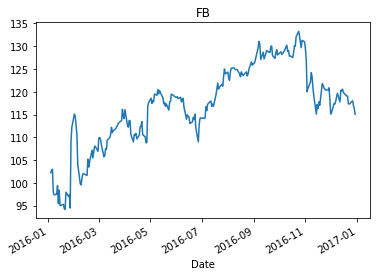

In [ ]:
import matplotlib.pyplot as plt
from pandas_datareader import get_data_yahoo
from datetime import date

# Set start and end dates
start = date(2016, 1, 1)
end = date(2016, 12, 31)

# Set the ticker and data_source
ticker = 'FB'

# Import the data using DataReader
stock_prices = get_data_yahoo(ticker, start, end)

# Plot close
stock_prices['Close'].plot(title=ticker)

# Show the plot
plt.show()

# **Economic Data**

This is the same series as 10-Year Constant Maturity Rate few years ago.

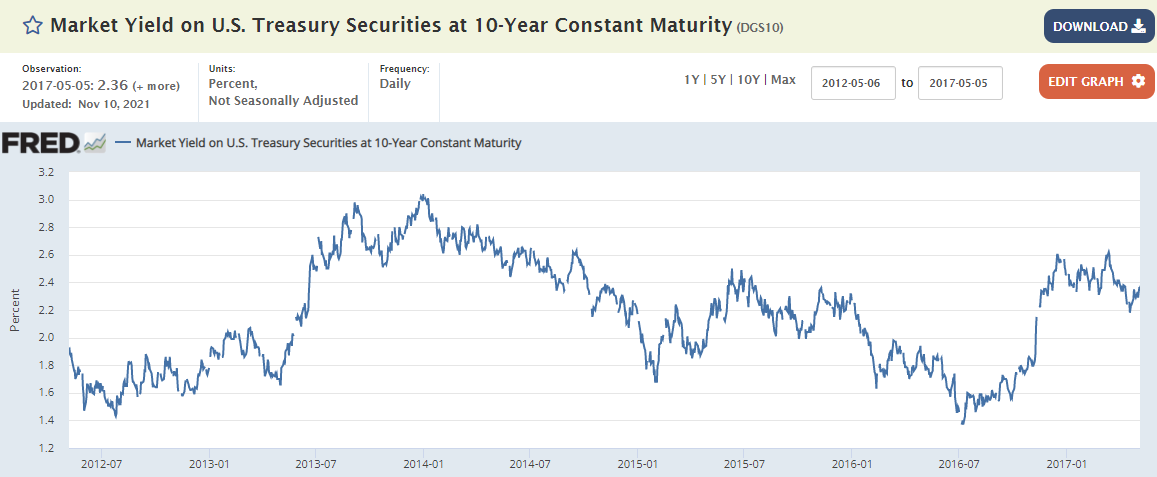

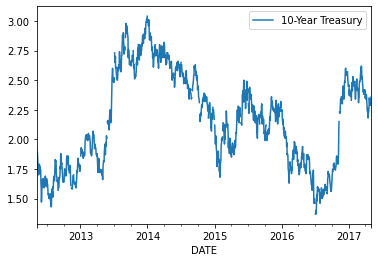

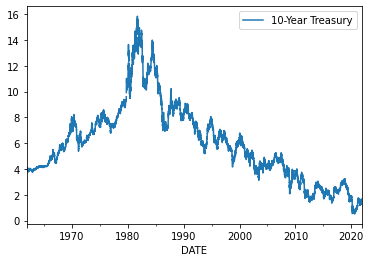

In [ ]:
from pandas_datareader.data import DataReader
from datetime import date
import matplotlib.pyplot as plt

series_code = 'DGS10' # 10-year Treasury Rate
data_source = 'fred'  # FED Economic Data Service
start = date(1962, 1, 1)
data = DataReader(series_code, data_source, start).rename(columns={series_code:'10-Year Treasury'})
data['2012-05-06':'2017-05-05'].plot()
plt.show()

data.plot()
plt.show()

# **Combine stock and economic data**

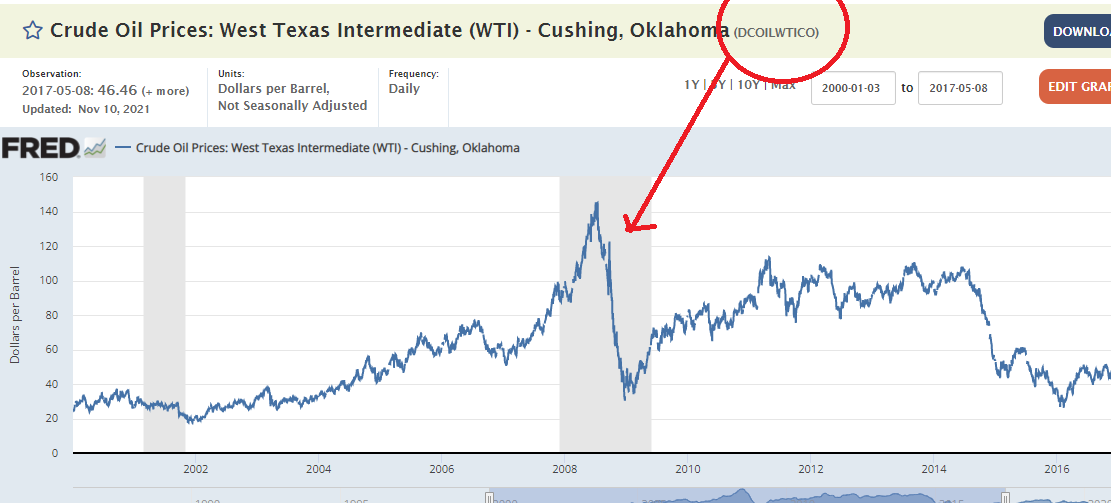

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5704 entries, 2000-01-03 to 2021-11-11
Freq: B
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       5502 non-null   float64
 1   DCOILWTICO  5486 non-null   float64
dtypes: float64(2)
memory usage: 133.7 KB


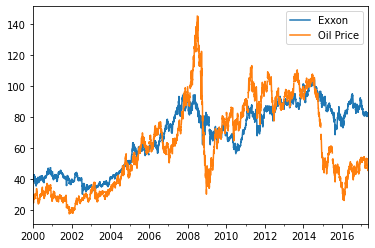

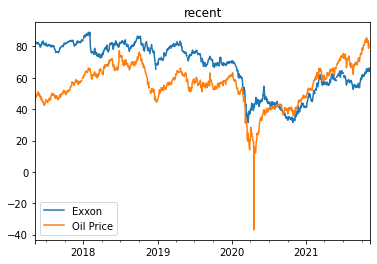

In [ ]:
import pandas as pd
from pandas_datareader.data import DataReader
from pandas_datareader import get_data_yahoo
from datetime import date
import matplotlib.pyplot as plt

start = date(2000, 1, 1)
series = 'DCOILWTICO' # West Texas Intermediate Oil Price
oil = DataReader(series, 'fred', start)
ticker = 'XOM' # Exxon Mobile Corporation
stock = get_data_yahoo(ticker, start)
data = pd.concat([stock[['Close']], oil], axis=1)
data.info()
data.columns = ['Exxon', 'Oil Price']
data[:'2017-5-8'].plot()
plt.show()

data['2017-5-9':].plot(title="recent")
plt.show()

### **Visualize the long-term gold price trend**

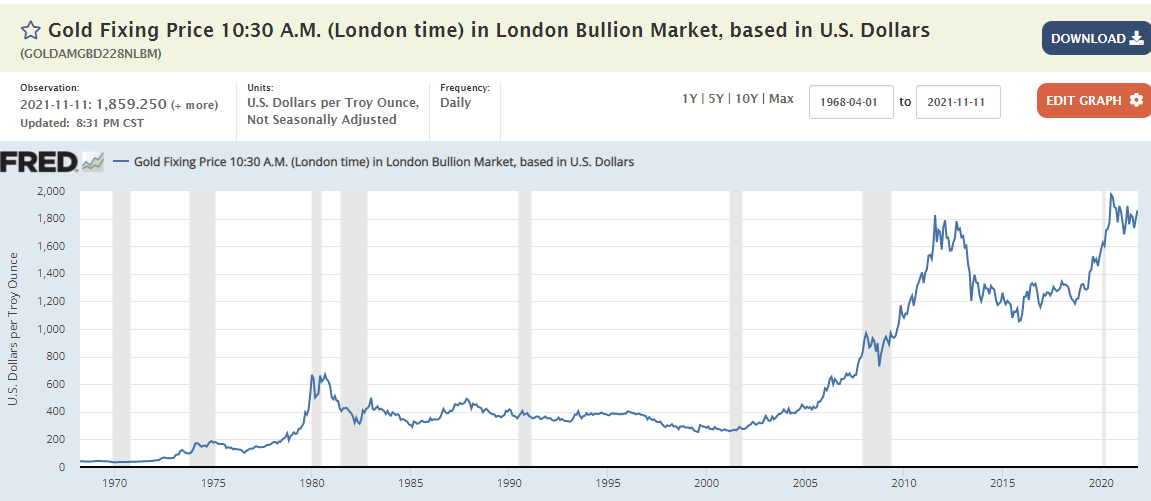

Here, you will use FRED to visualize the gold price trend over the last 50 years, specifically, the Gold Fixing Price 10:30 AM (London time) in London Bullion Market, in US Dollars. 

* Use `date()` to set start to January 1, 1968, and set series to series code `'GOLDAMGBD228NLBM'`.
Pass series as the data,'fred' as the data source, and `start` as the `start` date to `DataReader()`. Assign to `gold_price`.
* Inspect `gold_price` using `.info()`.
* Plot and show the `gold_price` series with title `'Gold Price'`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13989 entries, 1968-04-01 to 2021-11-11
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GOLDAMGBD228NLBM  13557 non-null  float64
dtypes: float64(1)
memory usage: 218.6 KB


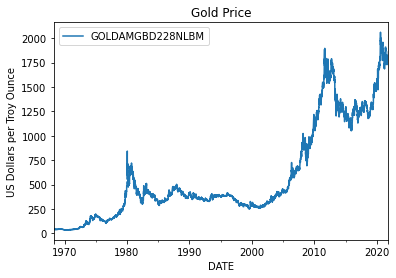

In [ ]:
import pandas as pd
from pandas_datareader.data import DataReader
from pandas_datareader import get_data_yahoo
from datetime import date
import matplotlib.pyplot as plt


# Set start date
start = date(1968, 1, 1)

# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price', ylabel='US Dollars per Troy Ounce')

# Show the plot
plt.show()

### **Compare labor market participation and unemployment rates**

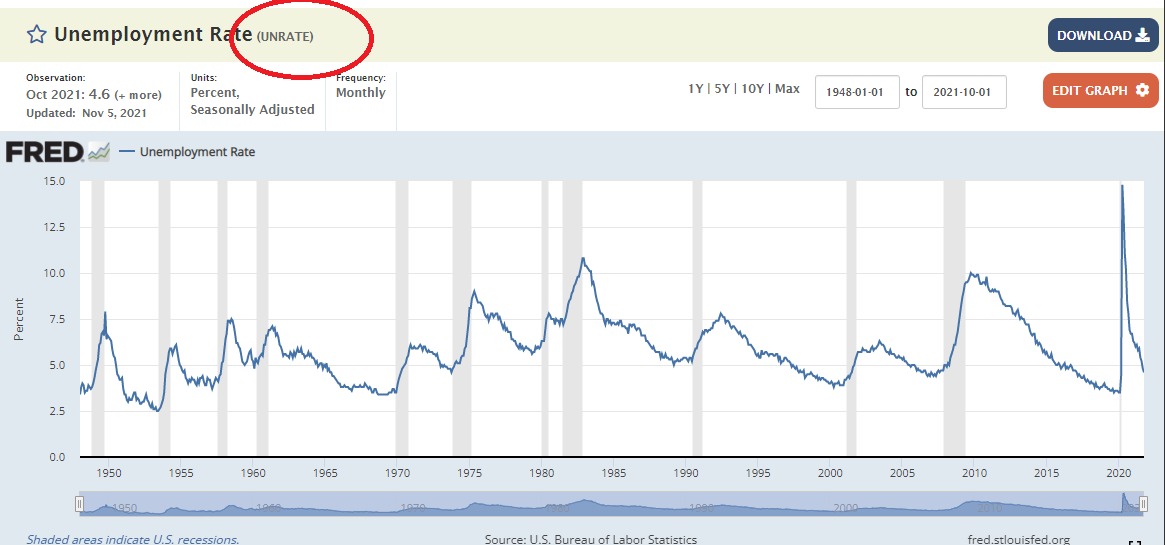

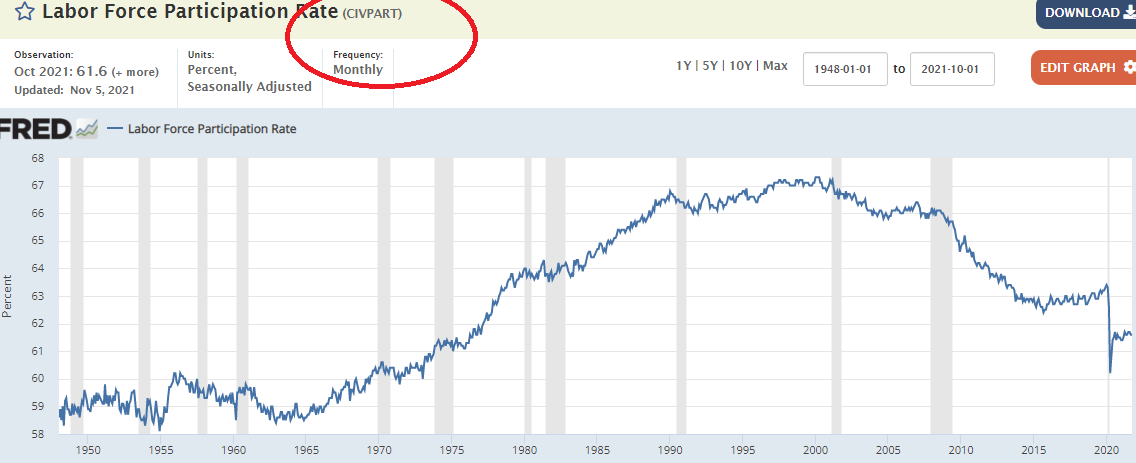

Two economic data series in FRED are the Civilian Unemployment Rate (`'UNRATE'`) and the Civilian Labor Force Participation Rate (`'CIVPART'`).

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

* Using `date()`, set start to January 1, 1950.
* Create `series` as a list containing the series codes `'UNRATE'` and `'CIVPART'`, in that order.
* Pass `series`, the data source `'fred'`, and the `start` date to `DataReader()`, and assign the result to `econ_data`.
* Use the `.columns` attribute to assign `'Unemployment Rate'` and `'Participation Rate'` as the new column labels.
* Plot and show `econ_data` using the `subplots=True` argument, and title it `'Labor Market'`.

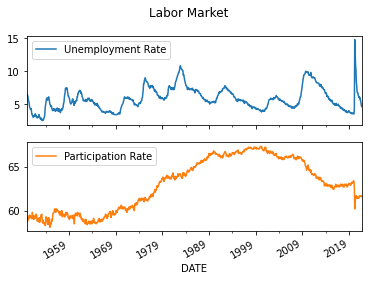

In [ ]:
import pandas as pd
from pandas_datareader.data import DataReader
from pandas_datareader import get_data_yahoo
from datetime import date
import matplotlib.pyplot as plt

# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title="Labor Market")

# Show the plot
plt.show()

# **Compare bond and stock performance**
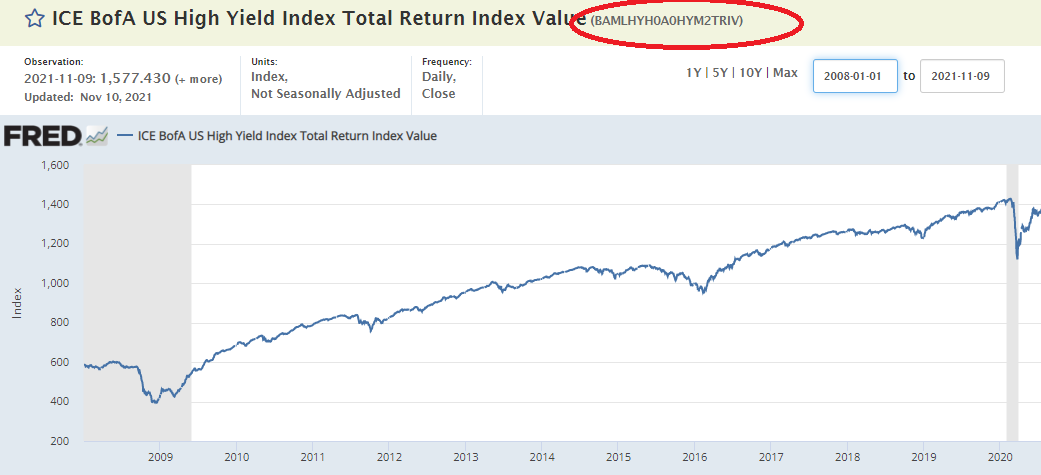

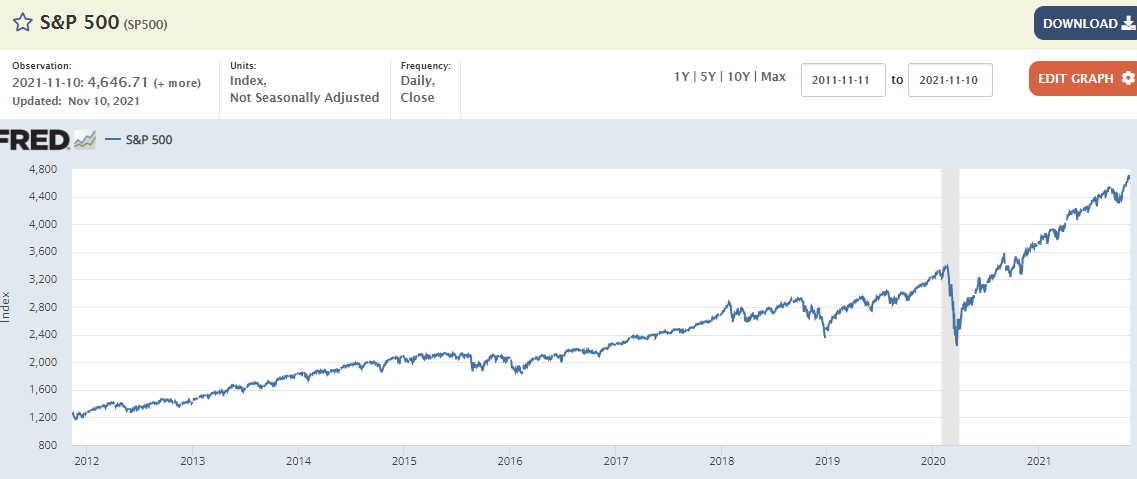

Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Google Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value (`'BAMLHYH0A0HYM2TRIV'`). For stocks, you'll use the S&P 500 Index (`'SP500'`). Both are available for the past 10 years from the Federal Reserve's FRED service.

* Using `date()`, set the start date to January 1, 2008.
* Set the `series` codes as a list containing `'BAMLHYH0A0HYM2TRIV'` and `'SP500'`.
* Use `DataReader()` to import both series from `'fred'` and assign to data.
* Plot and show data with `subplots`, titled `'Performance Comparison'`.

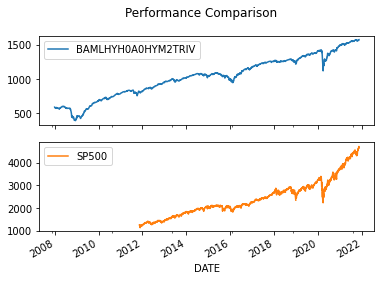

In [ ]:
import pandas as pd
from pandas_datareader.data import DataReader
from pandas_datareader import get_data_yahoo
from datetime import date
import matplotlib.pyplot as plt

# Set the start date
start = date(2008, 1, 1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(title='Performance Comparison', subplots=True)

# Show the plot
plt.show()

### **Get ticker for largest company**

In [ ]:
import pandas as pd

nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse = nyse.sort_values('Market Capitalization', ascending=False)
display(nyse[['Stock Symbol', 'Company Name']].head(3))

nyse = nyse.set_index('Stock Symbol') # Stock ticker as index

print("\nMax Stock Symbol")
print(f"nyse['Market Capitalization'].idxmax() = {nyse['Market Capitalization'].idxmax()}")
print(f"\nTotal records for sector = {nyse['Sector'].shape[0]}")
print(f"Total UNIQUE records for sector = {len(pd.Series(nyse['Sector'].unique()).dropna())}")
display(pd.Series(nyse['Sector'].unique()).dropna())


,Stock Symbol,Company Name
1586,JNJ,Johnson & Johnson
1125,XOM,Exxon Mobil Corporation
1548,JPM,J P Morgan Chase & Co



Max Stock Symbol
nyse['Market Capitalization'].idxmax() = JNJ

Total records for sector = 3147
Total UNIQUE records for sector = 12


0               Health Care
1                    Energy
2                   Finance
3             Miscellaneous
4          Public Utilities
5          Basic Industries
6         Consumer Services
7     Consumer Non-Durables
8                Technology
9             Capital Goods
10           Transportation
11        Consumer Durables
dtype: object

In [ ]:
display(nyse.loc[nyse['Sector']=='Technology', ['Company Name','Market Capitalization']].head())
display(nyse.loc[nyse['Sector']=='Technology', 'Market Capitalization'].idxmax())

,Company Name,Market Capitalization
Stock Symbol,,
ORCL,Oracle Corporation,"181,046,096,000.00"
TSM,Taiwan Semiconductor Manufacturing Company Ltd.,"165,070,380,000.00"
IBM,International Business Machines Corporation,"159,902,823,771.03"
SAP,SAP SE,"115,283,641,123.56"
DCM,"NTT DOCOMO, Inc","87,539,357,326.29"


'ORCL'

# **Get data for largest tech company with 2017 IPO**

## **คือ เราต้องใช้ฟังก์ชัน `pandas_datareader.get_data_yahoo()` แทน `pandas_datareader.data.DataReader()` เพราะตัวหลังมันต้องใช้ source เป็น `'iex'` ซึ่งเก็บเงินค่า `API_Key`**



The largest tech company with 2017 IPO is 'SNAP'.


,Close,Volume
Date,,
2017-03-02,24.48,217048900
2017-03-03,27.09,148166400
2017-03-06,23.77,72903000
2017-03-07,21.44,71857800
2017-03-08,22.81,49819100


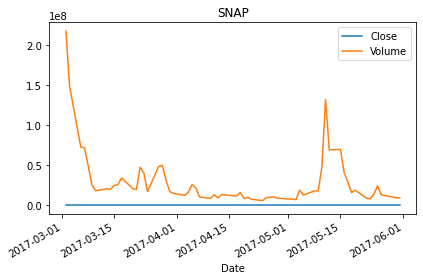

In [ ]:
from pandas_datareader import get_data_yahoo
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format


ticker = nyse.loc[(nyse.Sector=='Technology') & (nyse['IPO Year']==2017), 'Market Capitalization'].idxmax()
print(f"The largest tech company with 2017 IPO is '{ticker}'.")

data = get_data_yahoo(ticker, date(2010, 1, 1)) # Start: 2010/1/1
data = data.loc[:, ['Close', 'Volume']]
display(data.head())

data[:'2017-05-31'].plot(title=ticker)#, secondary_y='Volume')
plt.tight_layout(); plt.show()

## ต้องใช้ argument `secondary_y` ในกรณีที่สเกลของกราฟทั้งสองเส้นไม่เท่ากัน

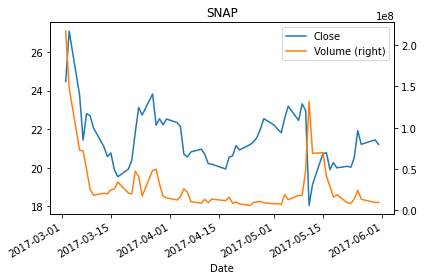

In [ ]:
data[:'2017-05-31'].plot(title=ticker, secondary_y='Volume')
plt.tight_layout()
plt.show()

### **Select the top 5 listed consumer companies**

Find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company. 

* Without using `.loc[]`, filter `listings` based on the condition that the `'Sector'` is equal to `'Consumer Services'` and assign to `consumer_services`.
* Sort `consumer_services` by `'Market Capitalization'` in descending order and assign it to `consumer_services2`.
* Using `.head()`, display the first 5 rows of the `'Company Name'`, `'Exchange'`, and `'Market Capitalization'` columns.

In [ ]:
import pandas as pd

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

# Select companies in Consumer Services
consumer_services = listings[listings["Sector"]=='Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values(by='Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print("consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head()")
display(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head()


,Company Name,Exchange,Market Capitalization
4,"Amazon.com, Inc.",nasdaq,"422,138,530,626.06"
3013,"Wal-Mart Stores, Inc.",nyse,"221,864,614,128.85"
3014,Walt Disney Company (The),nyse,"178,997,300,994.40"
6,Comcast Corporation,nasdaq,"176,474,549,756.04"
1438,"Home Depot, Inc. (The)",nyse,"175,262,566,893.17"


### **Get the ticker of the largest consumer services company**

***Google Finance has deprecated their API but DataReader now makes available the data source `'iex'` that provides the same functionality. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.***

Instead of indexing your data with a conditional expression, you can also filter by certain values with `.loc[row_selector, column_selector]`. Additionally, you can use `.set_index()` to set a particular column with unique values as the index of a DataFrame, and `.idxmax()` to return the index of the maximum value.

In this exercise, you will apply these methods of selecting companies to find the most valuable consumer services company on any of the three exchanges, and use its ticker to plot its stock price trend. 

* Use `.set_index()` to set the `'Stock Symbol'` column as the index for `listings`, assigning it to `listings_ss`.
* Use `.loc[]` to filter rows where `'Sector'` is equal to `'Consumer Services'`, select the column `'Market Capitalization'`, and apply .`idxmax()` to assign the ticker of the largest Consumer Services company to `ticker`.
* Using `date()`, set start to January 1, 2015.
* Use `DataReader()` to extract the stock data for the ticker from `'iex'` since `start` and store in `data`.
* Plot the `'close'` and `'volume'` values in data, with arguments `secondary_y='volume'` and `title=ticker`.

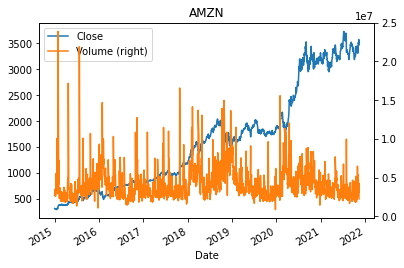

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import get_data_yahoo
from datetime import date

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

# Set the index of listings to Stock Symbol
listings_ss = listings.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss['Sector']=='Consumer Services', 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = get_data_yahoo(ticker, start)

# Plot close and volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

### **Get the largest consumer company listed after 1998**

***Google Finance has deprecated their API but DataReader now makes available instead the data source 'iex'. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.***

The functionality using `'iex'` is the same except: data is limited to the last five years, column headers are lower case.

You can filter your data by even more conditions by enclosing each condition in parentheses and using logical operators like `&` and `|`.

Here, you will find out which company is the largest consumer services company that went public after Amazon did in 1997. The data is contained in the column `'IPO Year'`; an Initial Public Offering (IPO) is a financial term that describes the first time that the stock of a private company is offered to the public.


* Set `'Stock Symbol'` as the index for `listings`.
* Use `.loc[]` to filter rows where `'Sector'` is `'Consumer Services'` and IPO Year starting 1998, and also select the `'Market Capitalization'` column. Apply `.idxmax()` and assign the result to `ticker`.
* Set the `start` date to January 1, 2015.
* Use the `DataReader` to get the stock data for the `ticker` from `'iex'` since start.
* Plot the `'close'` and `'volume'` prices of this company, using `'volume'` for `secondary_y` and `ticker` as the `title`.

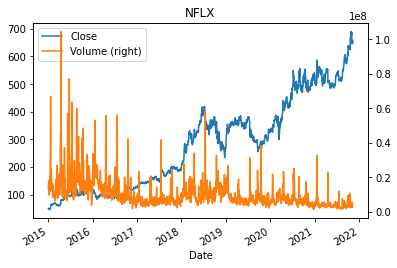

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import get_data_yahoo
from datetime import date

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

# Set Stock Symbol as the index
listings = listings.set_index('Stock Symbol')

# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings['Sector']=='Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = get_data_yahoo(ticker, start)

# Plot close and volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

# **Load prices for top 5 companies**

ไม่เข้าใจว่า ทำไม top_5 มีทั้ง GOOG และ GOOGL ออกมา ไม่เหมือนกับในสไลด์ ทั้งๆที่ก็อปมาทุกอย่าง น่าจะผิดพลาดมาตั้งแต่ไฟล์ข้อมูล

In [ ]:
import pandas as pd
from pandas_datareader import get_data_yahoo
from datetime import date
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=100)

nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')
nasdaq.set_index('Stock Symbol', inplace=True)
top_5 = nasdaq['Market Capitalization'].nlargest(n=6) # Top 5
top_5.div(1000000)

tickers = top_5.index.to_list()
tickers.remove('GOOGL')
display(tickers)

data = get_data_yahoo(tickers, start=date(2015, 1, 1))
display(data.info())


['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1729 entries, 2015-01-02 to 2021-11-11
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  1729 non-null   float64
 1   (Adj Close, GOOG)  1729 non-null   float64
 2   (Adj Close, MSFT)  1729 non-null   float64
 3   (Adj Close, AMZN)  1729 non-null   float64
 4   (Adj Close, FB)    1729 non-null   float64
 5   (Close, AAPL)      1729 non-null   float64
 6   (Close, GOOG)      1729 non-null   float64
 7   (Close, MSFT)      1729 non-null   float64
 8   (Close, AMZN)      1729 non-null   float64
 9   (Close, FB)        1729 non-null   float64
 10  (High, AAPL)       1729 non-null   float64
 11  (High, GOOG)       1729 non-null   float64
 12  (High, MSFT)       1729 non-null   float64
 13  (High, AMZN)       1729 non-null   float64
 14  (High, FB)         1729 non-null   float64
 15  (Low, AAPL)        1729 non-null   float64
 16  (Low, 

None

<Figure size 1200x800 with 0 Axes>

Attributes  Adj Close                         ...      Volume                       
Symbols          AAPL        GOOG       MSFT  ...        MSFT       AMZN          FB
Date                                          ...                                   
2015-01-02  24.745998  523.373108  41.269199  ...  27913900.0  2783200.0  18177500.0
2015-01-05  24.048866  512.463013  40.889698  ...  39673900.0  2774200.0  26452200.0
2015-01-06  24.051132  500.585632  40.289551  ...  36447900.0  3519000.0  27399300.0
2015-01-07  24.388378  499.727997  40.801441  ...  29114100.0  2640300.0  22045300.0
2015-01-08  25.325430  501.303680  42.001736  ...  29645200.0  3088400.0  23961000.0

[5 rows x 30 columns]

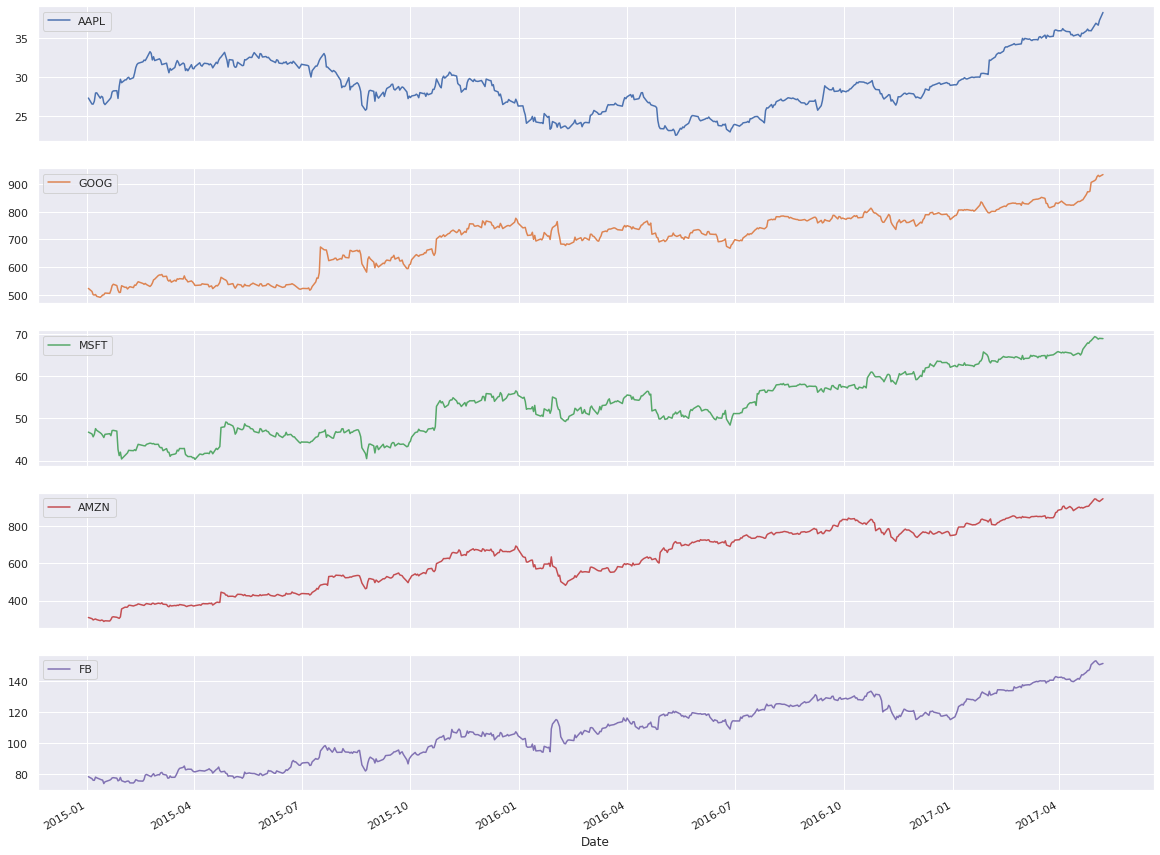

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme()

display(data.head())

data.loc['2015-01-02':'2017-05-08', 'Close'].plot(subplots=True, figsize=(20, 16), grid='on')
plt.show()

### **Get data for the 3 largest financial companies**

***Google Finance has deprecated their API but DataReader now makes available instead the data source `'iex'`. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.***

The functionality using `'iex'` is the same except: data is limited to the last five years, column headers are lower case, and for multiple tickers the return value is a dictionary rather than a pandas.Panel. We have included a few lines of code in the exercise to convert the dictionary into a DataFrame with `MultiIndex`.

A `pd.MultiIndex()` object has more than one identifier per row. This allows you to get the data based on criteria for multiple companies at once.

Let's apply this new skill to get the stock prices for the largest companies in the financial sector. 

* Set `'Stock Symbol'` as the `index` for `listings`, assigning it to `listings_ss`.
* Use `.loc[]` to filter rows where the company sector is `'Finance'` and extract the `'Market Capitalization'` column. Apply `.nlargest()` to assign the 3 largest companies by market cap to `top_3_companies`.
* Convert the `index` of the result to a list and assign it to `top_3_tickers`.
* Use `date()` to set `start` to January 1, 2015.
* Use `date()` to set `end` to April 1, 2020.
* Use the `DataReader()` to get the stock data for the `top_3_tickers` from `'iex'` since start until end and assign it to result.
* We are then creating a DataFrame by iterating over the ticker-data pairs and create a `MultiIndex` by appending `'ticker'` to `'date'` in the `Index`.
* Select `'close'` from data, apply `.unstack()`, and inspect the resulting DataFrame, now in wide format, with `.info()`.

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, BAC to WFC
Columns: 1321 entries, 2015-01-02 to 2020-04-01
dtypes: float64(1321)
memory usage: 31.0+ KB


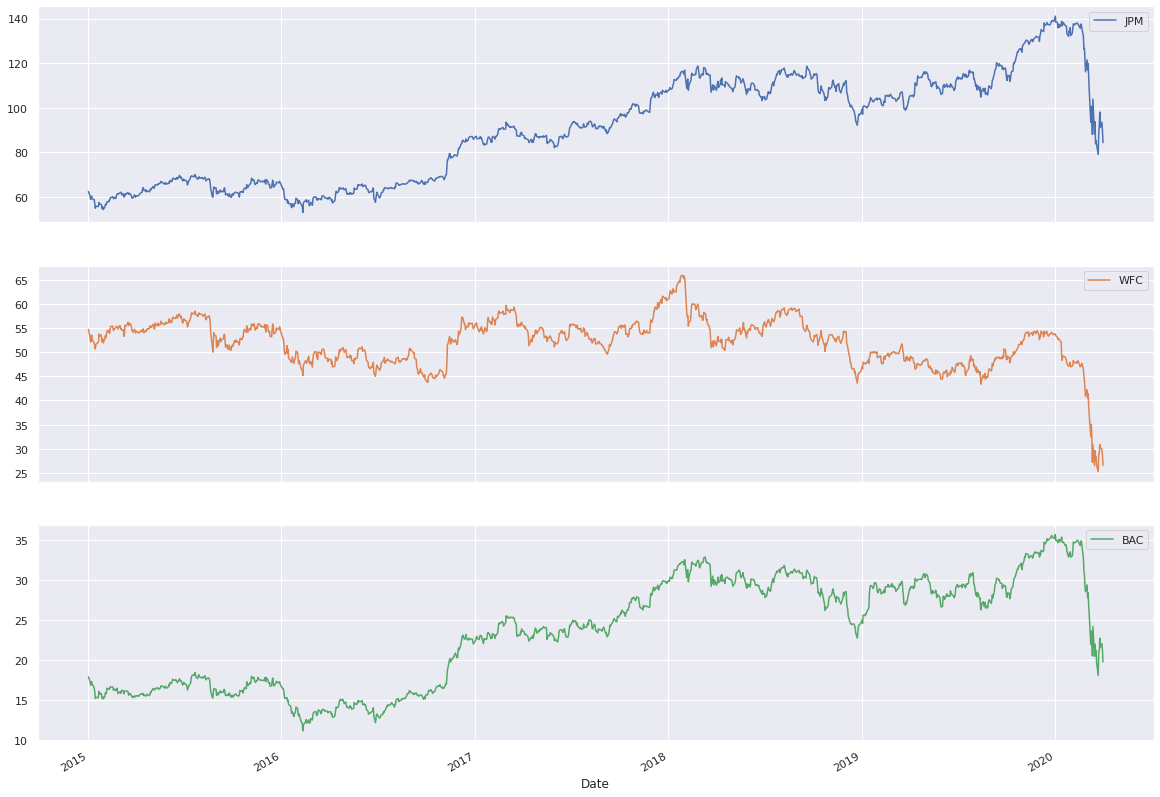

In [ ]:
import pandas as pd
from pandas_datareader import get_data_yahoo
from datetime import date
from matplotlib.pyplot import figure
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

# Set Stock Symbol as the index
listings_ss = listings.set_index('Stock Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss['Sector']=='Finance', 'Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.to_list()

# Set start date
start = date(2015, 1, 1)

# Set end date
end = date(2020, 4, 1)

# Import stock data
result = get_data_yahoo(top_3_tickers, start, end)
result = result[~result.index.duplicated()]
data = pd.DataFrame()
for ticker in result.columns.levels[1]:
    index = pd.MultiIndex.from_arrays([
            [ticker] * len(result),
            result.index.values
            ], names=['ticker', 'date'])
    ticker_df = pd.DataFrame(index=index)
    for col in result.columns.levels[0]:
        ticker_df[col] = result[col][ticker].values
    data = pd.concat([data, ticker_df])

# Unstack and inspect result
data['Close'].unstack().info()
data.head()

result["Close"].plot(subplots=True, figsize=(20, 15))
plt.show()

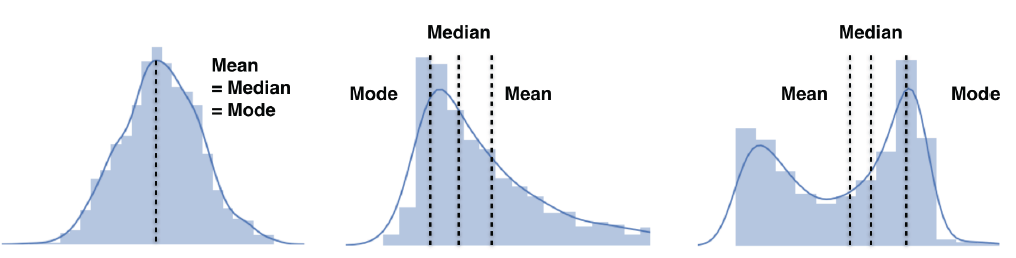

# **Calculate summary statistics**



,Market Capitalization
Stock Symbol,
AAPL,"740,024.47"
GOOG,"569,426.12"
MSFT,"501,903.06"
AMZN,"422,138.53"
FB,"402,834.50"



market_cap.mean() = 3180.7126214953823

market_cap.median() = 225.9684285

market_cap.mode() = 0   0.00
dtype: float64


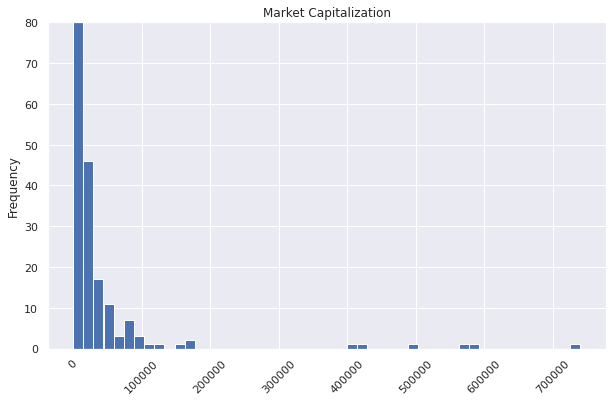

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


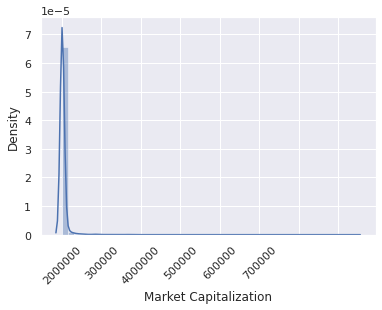

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a', index_col='Stock Symbol')
market_cap = nasdaq['Market Capitalization'].div(1e6)
display(nasdaq[['Market Capitalization']].div(1e6).head(6).drop('GOOGL'))
print(f"\nmarket_cap.mean() = {market_cap.mean()}")
print(f"\nmarket_cap.median() = {market_cap.median()}")
print(f"\nmarket_cap.mode() = {market_cap.mode()}")

ax = market_cap.plot(kind='hist', rot=45, bins=50, figsize=(10, 6), title='Market Capitalization')
plt.ylim([0, 80])
plt.show()

sns.distplot(market_cap).set_xticklabels(labels=[100000, 2000000, 300000, 4000000, 500000, 600000, 700000], rotation=45)
plt.show()

# **Dispersion**
* **Variance**: Sum all of the squared differences from mean and divide by $n − 1$
$$ var(x)  =  \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar x)^2$$
* **Standard deviation**: Square root of variance
$$ std(x) = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar x)^2}$$

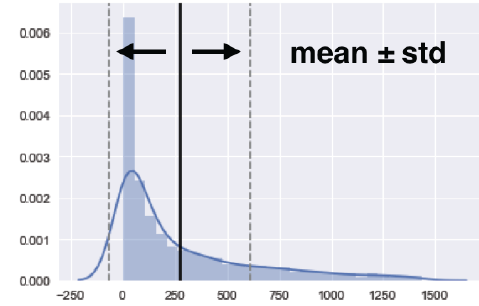

# **Calculate variance and standard deviation**

In [ ]:
variance = market_cap.var()
print(variance)
print(market_cap.std())

648773812.8182563
25471.038707093518


### **List the poorest and richest countries worldwide**

The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

You will use these statistics to explore the data in `'per_capita_income.csv'`, which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

* Load the `'per_capita_income.csv'` file into `income`. No additional arguments other than the file name are needed.
* Inspect the column names and data types with `.info()`.
* Using `.sort_values()`, sort (in descending order) the `income` DataFrame by the column which contains the `income` information.
* Display the first five rows of `income` using `.head()` and the last five rows using `.tail()`.

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values(by='Income per Capita', ascending=False)

# Display the first and last five rows
print("\n")
display(income.head())
print("\n\n\n")
display(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            184 non-null    object 
 1   Income per Capita  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB




,Country,Income per Capita
133,Qatar,"141,542.66"
97,"Macao SAR, China","111,496.63"
96,Luxembourg,"102,051.68"
144,Singapore,"85,382.30"
23,Brunei Darussalam,"78,369.29"


,Country,Income per Capita
121,Niger,955.48
94,Liberia,835.37
37,"Congo, Dem. Rep.",784.37
26,Burundi,727.15
31,Central African Republic,618.75


### **Global incomes: Central tendency**

The most common measures of central tendency are the 

* ***mean***, which is equal to the sum of all values divided by the total number of values, 
* ***median***, which separates the upper half of data from the lower half, and 
* ***mode***, which is the most frequent value in the data set. 

In this data set, the values for `'Income per Capita'` are floats, and there are no repeat values, so running `income['Income per Capita'].mode()` in your console returns an <ins>empty series</ins>. Here, you will use the floor division operator `//` to add a new column that measures income in thousands, rounded down, so that a value such as `11,543.43` becomes just `11`. Then, you will run the above functions to better understand how incomes are distributed.

* Use the appropriate function to calculate the global `mean` of `'Income per Capita'`.
* Use the appropriate function to calculate the global `median` of `'Income per Capita'`.
* Using broadcasting, create a new column `'Income per Capita (,000)'` equal to `income['Income per Capita'] // 1000`. Then use the appropriate function to calculate the `mode` for this new column.



19469.419565736953
11620.932519999998
0   1.00
dtype: float64


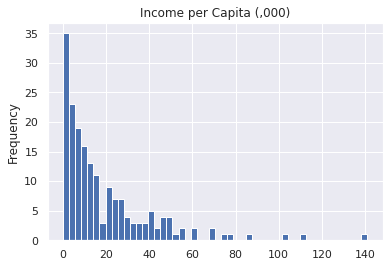

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

# Import the data
income = pd.read_csv('per_capita_income.csv')

# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
print(income['Income per Capita (,000)'].mode())

income['Income per Capita (,000)'].plot(kind='hist', bins=50, title='Income per Capita (,000)')
plt.show()

# **Quantiles with pandas**



,Market Capitalization
quantiles,
0.10,4.88
0.25,43.38
0.50,225.97
0.75,969.91
1.00,"740,024.47"



Interquartile Range


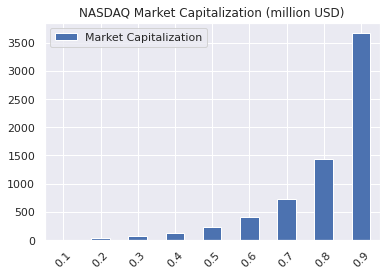

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a', index_col='Stock Symbol')
market_cap = nasdaq['Market Capitalization'].div(1e6)
m = market_cap.quantile([0.1, .25, 0.50, .75, 1.00])
m.name='Market Capitalization'
m.index.name = 'quantiles'
display(m.to_frame())

print("\nInterquartile Range")
m[.75] - m[.25] # Interquartile Range

deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
market_cap.quantile(deciles).to_frame().plot(kind='bar', title='NASDAQ Market Capitalization (million USD)', rot=45)
plt.show()


# **.describe() with deciles**

In [ ]:
market_cap.describe(percentiles=np.arange(.1, .91, .1))

count     3,167.00
mean      3,180.71
std      25,471.04
min           0.00
10%           4.88
20%          26.99
30%          65.71
40%         124.32
50%         225.97
60%         402.47
70%         723.16
80%       1,441.07
90%       3,671.50
max     740,024.47
Name: Market Capitalization, dtype: float64

### **Global incomes: Dispersion**

A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile `q` of a DataFrame `df` with the command `df.quantile(q)`; likewise, supplying a list as `q` will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

* Using the appropriate functions, calculate the mean of `income` per capita as `mean` and the standard deviation as `std`.
* Without using `.quantile()`, calculate and print the upper and lower bounds of an interval of one standard deviation around the `mean` in a list `bounds`:
  * subtract `std` from `mean` as the first element
  * add `std` to `mean` as the second element
* Using `.quantile()` and a list of two appropriate decimal values, calculate and print the first and the third quartile of `'Income per Capita'` as `quantiles`. Do the values match?
* Calculate and print the IQR, `iqr`, using the simple subtraction expression.

In [ ]:
import pandas as pd

# Import the data
income = pd.read_csv('per_capita_income.csv')

# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, mean+std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([0.25, 0.75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[0.75] - quantiles[0.25]
print(iqr)

[-2497.441641469126, 41436.280772943035]
0.25    3,922.36
0.75   26,558.75
Name: Income per Capita, dtype: float64
22636.39573


### **Deciles of the global income distribution**

A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to `.quantile()`, where `start` is the beginning of the interval (inclusive), `stop` is the end of the interval (exclusive), and `step` is the spacing between any two adjacent values:

```
np.arange(start, stop, step)
```

A standard bar graph is a great way to visualize the distribution of data. You can create one by adding `kind='bar'` as an argument to `.plot()`.

* Generate the percentages from 10% to 90% with increments of 10% using `np.arange()`, assign the result to `quantiles`, and print it.
* Using `quantiles` and `.quantile()`, calculate the deciles for the income per capita as `deciles`, and print the result.
* Plot and show the result as a bar chart with `plt.tight_layout()`. * Title it `'Global Income per Capita - Deciles'`.

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.10    1,805.91
0.20    3,177.26
0.30    5,506.32
0.40    8,510.73
0.50   11,620.93
0.60   15,790.37
0.70   22,563.08
0.80   32,517.69
0.90   47,377.89
Name: Income per Capita, dtype: float64


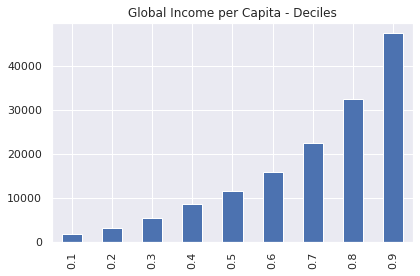

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Import the data
income = pd.read_csv('per_capita_income.csv')


# Generate range of deciles
quantiles = np.arange(start=0.1, stop=0.91, step=0.1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)
deciles.index = np.array(range(1, 10))/10
# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

# **10 year treasury: trend and distribution**


In [ ]:
from pandas_datareader.data import DataReader
from datetime import date

ty10 = DataReader('DGS10', 'fred', date(1962, 1, 1), date(2017, 5, 11))
ty10.info()
ty10.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14443 entries, 1962-01-02 to 2017-05-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DGS10   13825 non-null  float64
dtypes: float64(1)
memory usage: 225.7 KB


,DGS10
count,"13,825.00"
mean,6.29
std,2.85
min,1.37
25%,4.19
50%,6.04
75%,7.85
max,15.84


### There are missing values

,DGS10
DATE,
1962-02-12,nan
1962-02-22,nan
1962-04-20,nan
1962-05-30,nan
1962-07-04,nan
...,...
2016-12-26,nan
2017-01-02,nan
2017-01-16,nan


There are 618 missings.


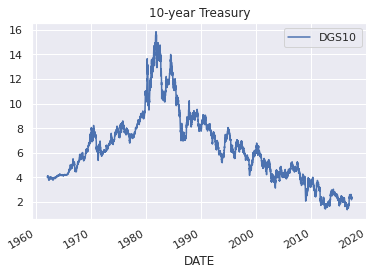

In [ ]:
display(ty10.loc[ty10['DGS10'].isnull()])
print(f"There are {14443 - 13825} missings.")
ty10.dropna(inplace=True)
ty10.plot(title='10-year Treasury')
plt.show()

# **10 year treasury: Density Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


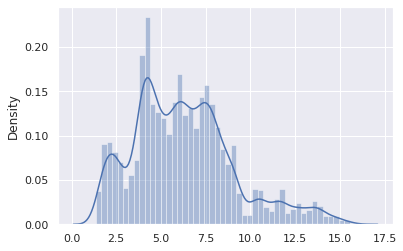

In [ ]:
import seaborn as sns

sns.distplot(ty10)
plt.show()

# **Add vertical line to the plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


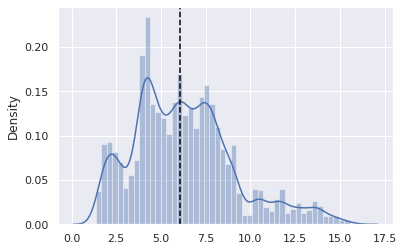

In [ ]:
ax = sns.distplot(ty10)
ax.axvline(ty10['DGS10'].median(), color='black', ls='--')
plt.show()

### **Visualizing international income distribution**

By default, the `sns.distplot()` function in the `seaborn` package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a ***kernel density estimation (KDE)***, or smoothed histogram. You can also use `distplot()` to create another kind of graph called a `rugplot`, which adds markers at the bottom of the chart to indicate the density of observations along the `x axis`.

```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)
```


* Import `seaborn` as `sns` and `matplotlib.pyplot` as `plt`.
* Print the summary statistics provided by `.describe()`.
* Plot and show a basic histogram of the `'Income per Capita'` column with `.distplot()`.
* Create and show a `rugplot` of the same data by setting the additional arguments `bins` equal to `50`, `kde` to `False`, and `rug` to `True`.

       Income per Capita
count         184.000000
mean        19469.419566
std         21966.861207
min           618.752859
25%          3922.358940
50%         11620.932520
75%         26558.754670
max        141542.662800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


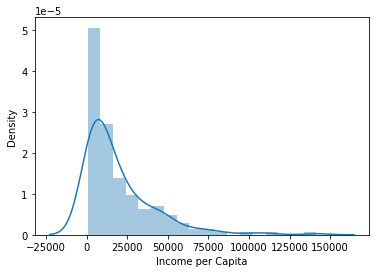

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


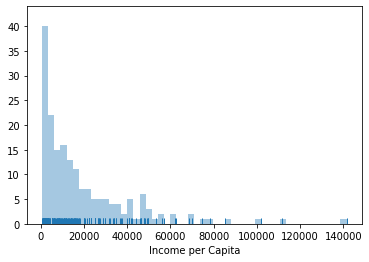

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

income = pd.read_csv('per_capita_income.csv')

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

### **Growth rates in Brazil, China, and the US**

It's time to extend your analysis beyond the levels of international per capita income to the growth rates. The `'income_growth.csv'` file contains the growth rates of per capita income over the last 40 years for Brazil, China, and the US.

You will plot the distribution of the historical growth rates for each country on the same chart using a KDE plot to faciliate visual comparison of the ranges of growth that these markets have experienced over this time period.

From this point in the course onwards, you should always inspect any DataFrame with `.info()`

* Load the file `'income_growth.csv'` into the variable growth. Parse the `'DATE'` column into dtype `datetime64` and set it as the `index`.
* Inspect the summary statistics for these three growth rates using the appropriate function.
* Iterate over the `growth.columns` attribute in a for loop to access their labels. Most of the code has been outlined for you.
* In each iteration of `distplot()`, pass in the iteration variable column to select the respective column, set the keyword `hist` to `False`, and set vlabel` to `column`.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

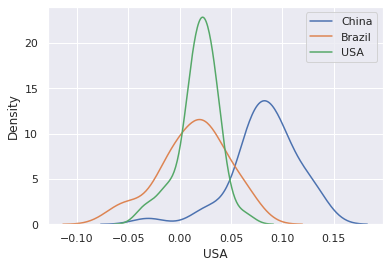

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.legend()
plt.show()

### **Highlighting values in the distribution**

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are `.dropna()` and `.fillna()`. You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using `.quantile()` to a particular column.

You also saw how to emphasize a particular value in a plot by adding a vertical line at position x across the axes:
```
Axes.axvline(x=0, color=None, ...)
```

You will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values. 

* Assign the column `'Income per Capita'` to `inc_per_capita`.
* Filter to keep only the rows in `inc_per_capita` that are lower than the 95th percentile. Reassign to the same variable.
* Plot a default histogram for the filtered version of `inc_per_capita` and assign it to `ax`.
* Use `ax.axvline()` with `color='b'` to highlight the mean of `inc_per_capita` in blue,
* Use `ax.axvline()` with `color='g'` to highlight the `median` in green. Show the result!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


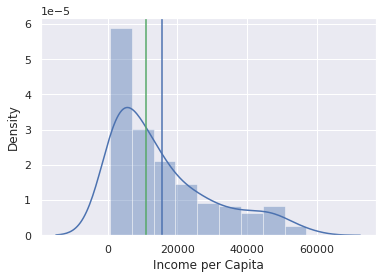

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format
income = pd.read_csv('per_capita_income.csv')

# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

# **Summarize categorical variables**

## **Categorical listing information**

In [ ]:
import pandas as pd

amex = pd.read_excel('listings.xlsx', sheet_name='amex', na_values=['n/a'])
amex['IPO Year'] = pd.to_datetime(amex['IPO Year'], format="%Y")
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           360 non-null    object        
 1   Company Name           360 non-null    object        
 2   Last Sale              346 non-null    float64       
 3   Market Capitalization  360 non-null    float64       
 4   IPO Year               105 non-null    datetime64[ns]
 5   Sector                 238 non-null    object        
 6   Industry               238 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 19.8+ KB


## **Categorical Unique Values**

In [ ]:
print(f"There are {amex['Sector'].nunique()} unique sectors.\n")
pd.Series(amex['Sector'].unique()).dropna()

There are 12 unique sectors.



0     Consumer Non-Durables
2             Capital Goods
3         Consumer Services
4               Health Care
5                    Energy
6                Technology
7          Basic Industries
8                   Finance
9          Public Utilities
10            Miscellaneous
11        Consumer Durables
12           Transportation
dtype: object

## **Using `.nunique()` to all columns simultaneously**

เพราะว่า `.nunique()` เป็น method ของ `pd.Series` เท่านั้น

In [ ]:
amex.apply(lambda x: x.nunique())

Stock Symbol             360
Company Name             326
Last Sale                323
Market Capitalization    317
IPO Year                  24
Sector                    12
Industry                  68
dtype: int64

## **How many observations per sector?**




In [ ]:
amex['Sector'].value_counts()

Health Care              49
Basic Industries         44
Energy                   28
Consumer Services        27
Capital Goods            24
Technology               20
Consumer Non-Durables    13
Finance                  12
Public Utilities         11
Miscellaneous             5
Consumer Durables         4
Transportation            1
Name: Sector, dtype: int64

## **How many IPOs per year?**

2002-01-01    19
2015-01-01    11
1999-01-01     9
1993-01-01     7
2014-01-01     6
2017-01-01     5
2003-01-01     5
2013-01-01     5
2004-01-01     5
1992-01-01     4
2011-01-01     3
2006-01-01     3
1986-01-01     3
2007-01-01     3
2005-01-01     3
2016-01-01     3
1998-01-01     2
1997-01-01     2
1988-01-01     2
1990-01-01     1
1987-01-01     1
2009-01-01     1
1996-01-01     1
1991-01-01     1
Name: IPO Year, dtype: int64

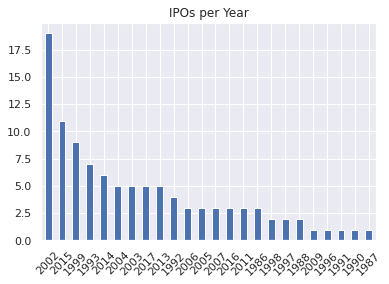

In [ ]:
display(amex['IPO Year'].value_counts())
amex['IPO Year'].dt.year.dropna().astype(int).value_counts().plot(kind='bar', title='IPOs per Year')
plt.xticks(rotation=45)
plt.show()

### **Companies by sector on all exchanges**

A categorical variable is a variable that is one of a limited number of values based on some qualitative property. A frequency distribution is a representation of the number of times that a categorical variable occurs.

Think back to the stock exchange data from the earlier chapters. The .`mean()` function isn't very helpful for understanding the frequency of `'Sector'` values such as `'Technology'` and `'Finance'`, whereas .`value_counts()` and `.nunique()` are.

* Create a list `exchanges` containing the exact strings of the names of the exchanges in the order listed above.
* Use a `for` loop to iterate over `exchanges` with an iterator variable `exchange` that contains the name of each `exchange`. In each iteration:
  * Apply `.value_counts()` to `'Sector'` and assign the result to `sectors`.
  * Sort `sectors` in descending order and plot them in a bar plot.


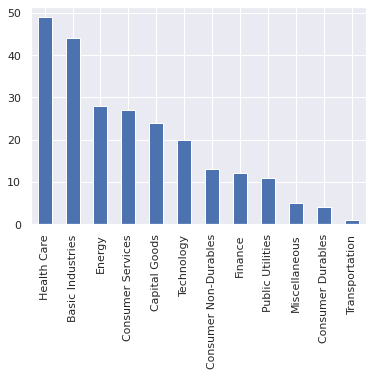

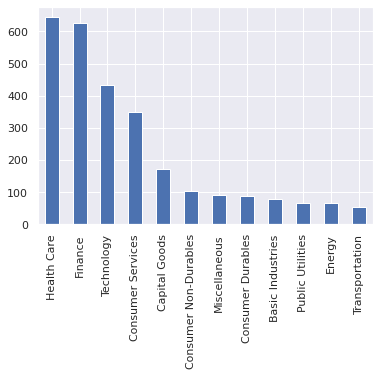

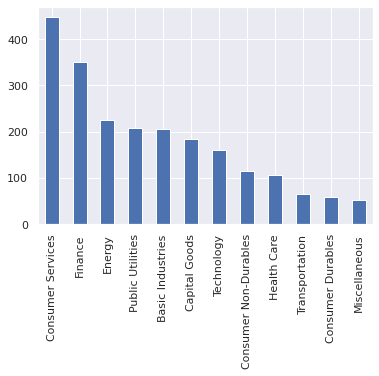

In [ ]:
import pandas as pd
from pandas_datareader import get_data_yahoo
from datetime import date
from matplotlib.pyplot import figure
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = {}
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listings[exchange] = listing


# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors = listings[exchange].Sector.value_counts()
    # Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar')
    # Show the plot
    plt.show()


### **Technology IPOs by year on all exchanges**

Each company in the `listings` dictionary has an `IPO Year` between 1972 and 2017. Therefore, in this context, it is appropriate to consider the `'IPO Year'` column of each sheet as a categorical variable with a well-defined order even though it is of dtype `float64`.

Here you will combine data from all three exchanges and plot the distribution of IPO years for companies in the Technology sector. 

* Use a `for` loop with iterator variable `exchange` that contains the name of each exchange.
  * In each iteration, append the DataFrame corresponding to the key `exchange` in listings to `all_listings`.

* After the loop completes, use `pd.concat()` to combine the three DataFrames in `all_listings` and assign the result to `listing_data`.
* Filter `listing_data` for `'Technology'` companies and assign the result to `tech_companies`.
* Assign the `'IPO Year'` column from `tech_companies` to `ipo years`.
* For this data, use `.dropna()` to remove missing values and `.astype()` to convert to `int`.
* Apply `.value_counts()` to `ipo_years`, sort the years in ascending order, and create a bar plot titled `'Tech IPOs by Year'`.
* Rotate `xticks` by 45 degrees and show the result.

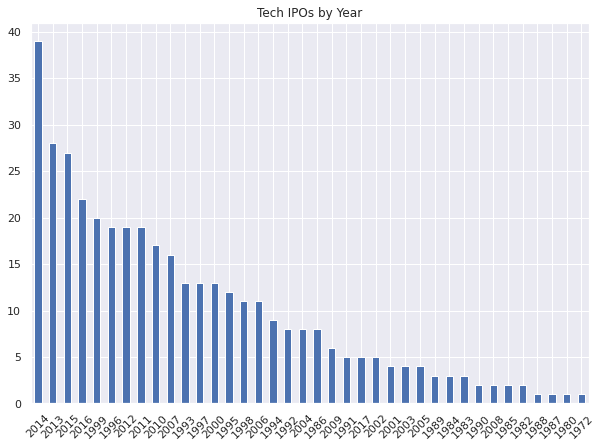

In [ ]:
import pandas as pd
from pandas_datareader import get_data_yahoo
from datetime import date
from matplotlib.pyplot import figure
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = {}
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listings[exchange] = listing

# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []

# Use for loop to create listing_data
for exchange in exchanges:
    all_listings.append(listings[exchange])
    
# Combine DataFrames
listing_data = pd.concat(all_listings)

# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(sort=True).plot(kind='bar', title='Tech IPOs by Year', figsize=(10, 7))

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

# **Group your data by sector**

In [8]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')
nasdaq['Market Capitalization'] /= 1e6 # in million dollars
nasdaq['IPO Year'] = pd.to_datetime(nasdaq['IPO Year'], format='%Y')
nasdaq.info()
nasdaq.head()

# Group your data by sector
nasdaq_by_sector = nasdaq.groupby('Sector')
print("\n\nnasdaq.groupby('Sector')['Market Capitalization']")
print("===================================================\n\n")
display(nasdaq.groupby('Sector')['Market Capitalization'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           3167 non-null   object        
 1   Company Name           3167 non-null   object        
 2   Last Sale              3165 non-null   float64       
 3   Market Capitalization  3167 non-null   float64       
 4   IPO Year               1386 non-null   datetime64[ns]
 5   Sector                 2767 non-null   object        
 6   Industry               2767 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 173.3+ KB


nasdaq.groupby('Sector')['Market Capitalization']




Sector
Basic Industries           724.90
Capital Goods            1,511.24
Consumer Durables          839.80
Consumer Non-Durables    3,104.05
Consumer Services        5,582.34
Energy                     826.61
Finance                  1,044.09
Health Care              1,758.71
Miscellaneous            3,445.66
Public Utilities         2,357.87
Technology              10,883.43
Transportation           2,869.66
Name: Market Capitalization, dtype: float64

## **`nasdaq_by_sector` เป็น groupby object เราสามารถเข้าถึงสมาชิกข้างในได้ด้วยการเขียน loop**

In [9]:
count = 0
for sector, data in nasdaq_by_sector:
    display(sector, data.head())
    print("===================================================================")
    count += 1
    if count == 3:
        break

'Basic Industries'

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
169,STLD,"Steel Dynamics, Inc.",32.91,"7,976.84",1996-01-01,Basic Industries,Steel/Iron Ore
192,SRCL,"Stericycle, Inc.",81.92,"6,983.45",1996-01-01,Basic Industries,Environmental Services
249,RGLD,"Royal Gold, Inc.",74.53,"4,869.27",NaT,Basic Industries,Precious Metals
284,MEOH,Methanex Corporation,45.75,"4,110.31",NaT,Basic Industries,Major Chemicals
320,GOLD,Randgold Resources Limited,93.90,"3,614.23",NaT,Basic Industries,Precious Metals


'Capital Goods'

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
29,TSLA,"Tesla, Inc.",304.00,"49,614.83",2010-01-01,Capital Goods,Auto Manufacturing
61,ILMN,"Illumina, Inc.",173.68,"25,409.38",2000-01-01,Capital Goods,Biotechnology: Laboratory Analytical Instruments
67,PCAR,PACCAR Inc.,64.63,"22,701.60",NaT,Capital Goods,Auto Manufacturing
97,KLAC,KLA-Tencor Corporation,95.33,"14,941.01",1980-01-01,Capital Goods,Electronic Components
142,GRMN,Garmin Ltd.,48.69,"9,175.46",2000-01-01,Capital Goods,Industrial Machinery/Components


'Consumer Durables'

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
104,CPRT,"Copart, Inc.",29.65,"13,620.92",1994-01-01,Consumer Durables,Automotive Aftermarket
160,GT,The Goodyear Tire & Rubber Company,34.14,"8,600.91",NaT,Consumer Durables,Automotive Aftermarket
250,POOL,Pool Corporation,116.43,"4,807.11",1995-01-01,Consumer Durables,Industrial Specialties
269,CASY,"Caseys General Stores, Inc.",112.01,"4,390.59",1983-01-01,Consumer Durables,Automotive Aftermarket
322,VWR,VWR Corporation,27.24,"3,587.05",2014-01-01,Consumer Durables,Diversified Electronic Products


## **หรือจะเข้าถึงข้อมูลเดิมที่แบ่งตามกลุ่ม ด้วยวิธี `.get_group() `ก็ได้**

In [10]:
print('Basic Industries\n')
display(nasdaq_by_sector.get_group('Basic Industries').head())

print("\n\nConsumer Durables\n")
display(nasdaq_by_sector.get_group('Consumer Durables').head())

Basic Industries



,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
169,STLD,"Steel Dynamics, Inc.",32.91,"7,976.84",1996-01-01,Basic Industries,Steel/Iron Ore
192,SRCL,"Stericycle, Inc.",81.92,"6,983.45",1996-01-01,Basic Industries,Environmental Services
249,RGLD,"Royal Gold, Inc.",74.53,"4,869.27",NaT,Basic Industries,Precious Metals
284,MEOH,Methanex Corporation,45.75,"4,110.31",NaT,Basic Industries,Major Chemicals
320,GOLD,Randgold Resources Limited,93.90,"3,614.23",NaT,Basic Industries,Precious Metals




Consumer Durables



,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
104,CPRT,"Copart, Inc.",29.65,"13,620.92",1994-01-01,Consumer Durables,Automotive Aftermarket
160,GT,The Goodyear Tire & Rubber Company,34.14,"8,600.91",NaT,Consumer Durables,Automotive Aftermarket
250,POOL,Pool Corporation,116.43,"4,807.11",1995-01-01,Consumer Durables,Industrial Specialties
269,CASY,"Caseys General Stores, Inc.",112.01,"4,390.59",1983-01-01,Consumer Durables,Automotive Aftermarket
322,VWR,VWR Corporation,27.24,"3,587.05",2014-01-01,Consumer Durables,Diversified Electronic Products


# **Visualize category summaries**

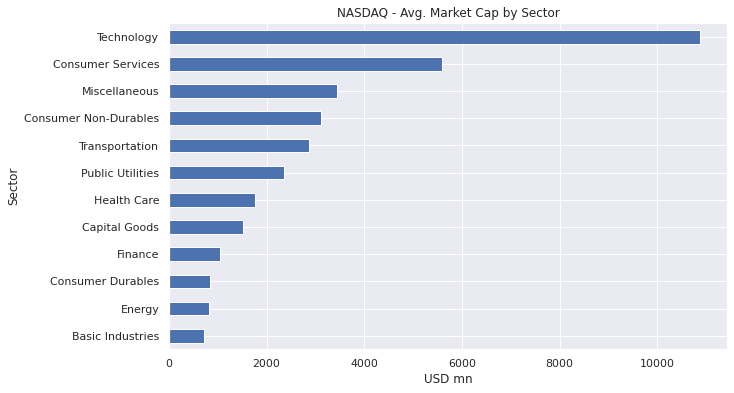

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

title = 'NASDAQ - Avg. Market Cap by Sector'
nasdaq.groupby('Sector')['Market Capitalization'].mean().sort_values().plot(kind='barh', title=title, figsize=(10, 6))
plt.xlabel('USD mn')
plt.show()

# **Aggregate summary for all numeric columns**

ไม่มีคอลัมน์ `'IPO Year'` ตรงนี้ เพราะแปลงเป็น `datetime64` แล้ว

In [12]:
nasdaq_by_sector.mean()

,Last Sale,Market Capitalization
Sector,,
Basic Industries,21.60,724.90
Capital Goods,26.19,"1,511.24"
Consumer Durables,24.36,839.80
Consumer Non-Durables,25.75,"3,104.05"
Consumer Services,34.92,"5,582.34"
Energy,15.50,826.61
Finance,29.64,"1,044.09"
Health Care,19.46,"1,758.71"
Miscellaneous,46.09,"3,445.66"


### **Median market capitalization by sector**

Aggregate data is data combined from several measurements. The `.groupby()` function is helpful in aggregating your data by a specific category.

You have seen that the <ins>market capitalization data has ***large outliers***</ins>. To get a more robust summary of the market value of companies in each sector, you will calculate the `median` market capitalization by sector. 

* Inspect `nyse` using `.info()`.
* With broadcasting and `.div()`, create a new column `market_cap_m` that contains the 'Market Capitalization'` in ***million USD***.
* Omit the column `'Market Capitalization'` with `.drop()`.
* Apply the `.groupby()` method to `nyse`, using `'Sector'` as the column to group your data by.
* Calculate the `median` of the `market_cap_m` column as `median_mcap_by_sector`.
* Plot the result as a horizontal bar chart with the title `'NYSE - Median Market Capitalization'`. Use `plt.xlabel()` with `'USD mn'` to add a label.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           3147 non-null   object        
 1   Company Name           3147 non-null   object        
 2   Last Sale              3079 non-null   float64       
 3   Market Capitalization  3147 non-null   float64       
 4   IPO Year               1385 non-null   datetime64[ns]
 5   Sector                 2177 non-null   object        
 6   Industry               2177 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           3147 non-null   object        
 1   Co

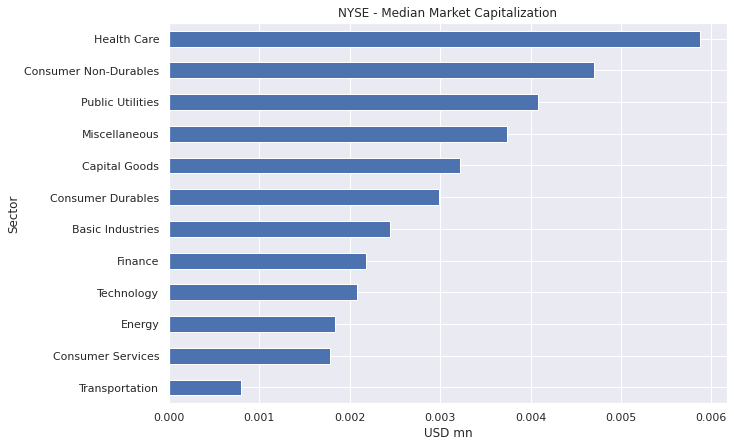

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nyse['Market Capitalization'] /= 1e6 # in million dollars
nyse['IPO Year'] = pd.to_datetime(nasdaq['IPO Year'], format='%Y')
nyse.info()
nyse.head()

# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector['market_cap_m'].median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.sort_values().plot(kind='barh', title='NYSE - Median Market Capitalization', figsize=(10, 7))

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

### **Median market capitalization by IPO year**

Let's now analyze how `'Market Capitalization'` has evolved for different `'IPO Year'`s. You can combine data from all three exchanges to get a more comprehensive view.


* Inspect and display `listings` using `.info()` and `.head()`.
* Using broadcasting, create a new column `market_cap_m` for `listings` that contains the `'Market Capitalization'` in millions of USD.
* Select all companies with an `'IPO Year'` after 1985.
* Drop all missing values in the `'IPO Year'` column, and convert the remaining values to `dtype` integer.
* Group `listings` by `'IPO Year'`, select the `market_cap_m` column and calculate the `median`, sort with `.sort_index()`, and assign the result to `ipo_by_year`.
* Plot and show the results as a bar chart.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


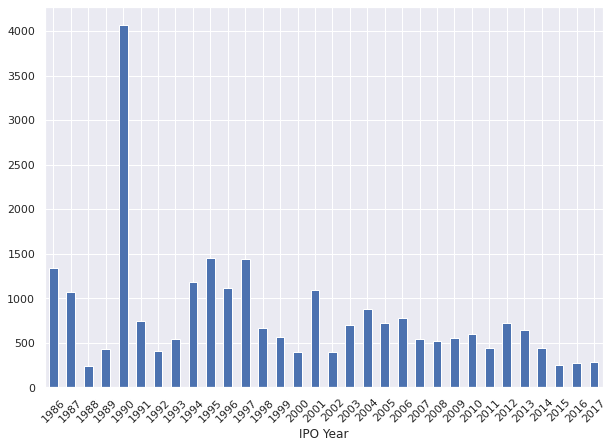

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

listings.info()
listings.head()

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listings = listings[listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
listings['IPO Year'] = listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listings.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar', figsize=(10, 7), rot = 45)

# Show the plot
plt.show()

### **All summary statistics by sector**

You can apply the various summary statistics that you have learned about in the last chapter to a groupby object to obtain the result on a per-category basis. This includes the `.describe()` function, which provides several insights all at once!

Here, you will practice this with the NASDAQ listings. 

* Inspect the nasdaq data using `.info()`.
* Create a new column `market_cap_m` that contains the `'Market Capitalization'` in millions of USD. On the next line, drop the column `'Market Capitalization'`.
* Group your nasdaq data by `'Sector'` and assign to `nasdaq_by_sector`.
* Call the method `.describe()` on `nasdaq_by_sector`, assign to `summary`, and print the result.
* This works, but result is in long format and uses a `pd.MultiIndex()` that you saw earlier. Convert summary to wide format by calling .`unstack()`.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')
nasdaq['IPO Year'] = pd.to_datetime(nasdaq['IPO Year'], format="%Y")


# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print("\n\nnasdaq_by_sector.describe()\n")
display(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print("\n\nnasdaq_by_sector.describe().unstack()")
print("===========================================")
display(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Stock Symbol           3167 non-null   object        
 1   Company Name           3167 non-null   object        
 2   Last Sale              3165 non-null   float64       
 3   Market Capitalization  3167 non-null   float64       
 4   IPO Year               1386 non-null   datetime64[ns]
 5   Sector                 2767 non-null   object        
 6   Industry               2767 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 173.3+ KB


nasdaq_by_sector.describe()



Last Sale               ... market_cap_m                    
                          count  mean    std  ...          50%      75%        max
Sector                                        ...                                 
Basic Industries          78.00 21.60  29.01  ...       150.39   721.20   7,976.84
Capital Goods            172.00 26.19  36.60  ...       293.80 1,031.73  49,614.83
Consumer Durables         88.00 24.36  44.40  ...       177.59   669.01  13,620.92
Consumer Non-Durables    103.00 25.75  34.67  ...       229.93 1,149.09 111,367.95
Consumer Services        348.00 34.92  67.42  ...       524.15 2,463.64 422,138.53
Energy                    65.00 15.50  22.95  ...       182.43   728.11   9,468.72
Finance                  627.00 29.64  61.45  ...       205.48   732.08  39,372.42
Health Care              645.00 19.46  46.93  ...       173.82   662.95 118,927.21
Miscellaneous             89.00 46.09 186.95  ...       228.10 1,544.48  85,496.05
Public Utilities          66.00 18.64  19.31  ...       379.00 1,115.59  52,930.71
Technology               433.00 31.10  63.76  ...       600.72 2,464.72 740,024.47
Transportation            52.00 28.10  30.63  ...       479.78 1,724.09  43,005.67

[12 rows x 16 columns]



nasdaq_by_sector.describe().unstack()


                     Sector               
Last Sale     count  Basic Industries             78.00
                     Capital Goods               172.00
                     Consumer Durables            88.00
                     Consumer Non-Durables       103.00
                     Consumer Services           348.00
                     Energy                       65.00
                     Finance                     627.00
                     Health Care                 645.00
                     Miscellaneous                89.00
                     Public Utilities             66.00
                     Technology                  433.00
                     Transportation               52.00
              mean   Basic Industries             21.60
                     Capital Goods                26.19
                     Consumer Durables            24.36
                     Consumer Non-Durables        25.75
                     Consumer Services            34.92
     

# **Several aggregations by category**


In [43]:
import pandas as pd

nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')
nasdaq['IPO Year'] = pd.to_datetime(nasdaq['IPO Year'], format="%Y")

#nasdaq['Market Capitalization'] /= 1e6
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
by_sector = nasdaq.groupby('Sector')
display(by_sector.market_cap_m.agg(['size', 'mean']).sort_values('size'))
#display(by_sector['Market Capitalization'].agg(['size', 'mean']).sort_values('size'))
print("===========================================================")


,size,mean
Sector,,
Transportation,52,"2,869.66"
Energy,66,826.61
Public Utilities,66,"2,357.87"
Basic Industries,78,724.90
Consumer Durables,88,839.80
Miscellaneous,89,"3,445.66"
Consumer Non-Durables,103,"3,104.05"
Capital Goods,172,"1,511.24"
Consumer Services,348,"5,582.34"


### **Company value by exchange and sector**

You can generate more fine-grained summaries of your data by providing a ***list of columns*** inside `.groupby()` and/or applying a statistical method such as `.mean()` directly to one or more numerical columns.

Here, you will calculate the `median` market capitalization for each sector, differentiated by the `exchange` that the companies are listed on. You will also use `.unstack()` to pivot the exchange labels from the rows into the columns. It's a good idea to inspect `listings` in your console before starting the exercise!

* Group your data by both `'Sector'` and `'Exchange'`, assigning the result to `by_sector_exchange`.
* Calculate the `median` market capitalization for `by_sector_exchange` and assign to `mcap_by_sector_exchange`.
* Display the first 5 rows of the result with `.head()`.
* Call `.unstack()` on `mcap_by_sector_exchange` to move the Exchange labels to the columns, and assign to `mcap_unstacked`.
* Plot the result as a bar chart with the title `'Median Market Capitalization by Exchange'` and `xlabel` set to `'USD mn'`,


listings.groupby(['Sector', 'Exchange'])['market_cap_m'].median()



Sector                 Exchange
Basic Industries       amex         148.56
                       nasdaq       150.39
                       nyse       2,450.24
Capital Goods          amex          49.60
                       nasdaq       293.80
                       nyse       3,215.11
Consumer Durables      amex          18.34
                       nasdaq       177.59
                       nyse       2,982.59
Consumer Non-Durables  amex          60.09
                       nasdaq       229.93
                       nyse       4,701.72
Consumer Services      amex          44.14
                       nasdaq       524.15
                       nyse       1,784.21
Energy                 amex          50.96
                       nasdaq       182.43
                       nyse       1,838.88
Finance                amex         238.61
                       nasdaq       205.48
                       nyse       2,177.16
Health Care            amex          42.76
                      



listings.groupby(['Sector', 'Exchange'])['market_cap_m'].median().unstack()



Exchange,amex,nasdaq,nyse
Sector,,,
Basic Industries,148.56,150.39,"2,450.24"
Capital Goods,49.60,293.80,"3,215.11"
Consumer Durables,18.34,177.59,"2,982.59"
Consumer Non-Durables,60.09,229.93,"4,701.72"
Consumer Services,44.14,524.15,"1,784.21"
Energy,50.96,182.43,"1,838.88"
Finance,238.61,205.48,"2,177.16"
Health Care,42.76,173.82,"5,879.06"
Miscellaneous,59.13,228.10,"3,734.56"


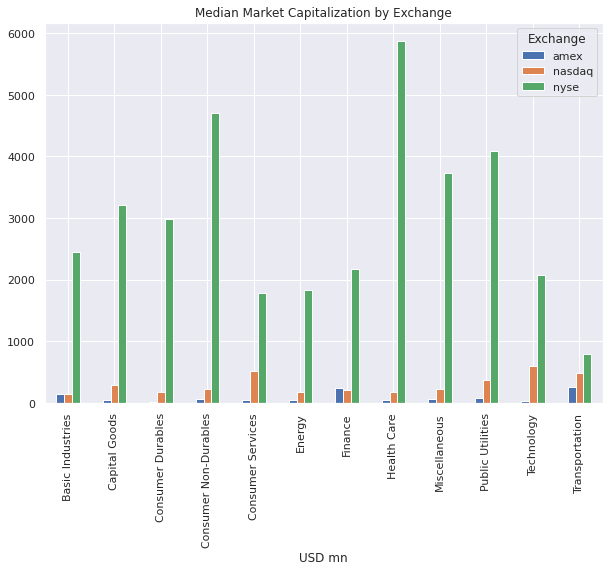

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

listings['market_cap_m'] = listings['Market Capitalization']/1e6
listings.drop(columns='Market Capitalization', inplace=True)

# Group listings by Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print("listings.groupby(['Sector', 'Exchange'])['market_cap_m'].median()")
print("========================================================================\n")
display(listings.groupby(['Sector', 'Exchange'])['market_cap_m'].median())



# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()
print("\n\nlistings.groupby(['Sector', 'Exchange'])['market_cap_m'].median().unstack()")
print("==========================================================================\n")
display(listings.groupby(['Sector', 'Exchange'])['market_cap_m'].median().unstack())

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange', figsize=(10, 7))

# Set the x label
plt.xlabel('USD mn')

# Show the plot
plt.show()

### **Calculate several metrics by sector and exchange**

The `.agg()` function allows you to aggregate your data in even more ways by accepting two kinds of arguments. Providing a list of names of statistical methods calculates more than one summary statistic at once, and providing a dictionary where keys are column names and values are statistical methods applies a particular summary statistic to a designated column.

In this exercise, you will calculate the mean, median, and standard deviation of market capitalizations in millions of USD. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame, with reference column 'Exchange' is available in your workspace.

* With broadcasting and `.div()`, create a new column `'market_cap_m'` that contains the `'Market Capitalization'` data in millions of USD.
* Group your data by both `'Sector'` and `'Exchange'`, assigning the result to `by_sector_exchange`.
* Assign the `market_cap_m` column of `by_sector_exchange` to a variable `bse_mcm`.
* Use `.agg()` and a dictionary argument to calculate the `mean`, `median`, and standard deviation for `market_cap_m` storing the results in `'Average'`, `'Median'`, and `'Standard Deviation'`, respectively, and assign to `summary`.

### **`.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})` ใช้ไม่ได้แล้ว ให้ใช้ `.agg(Average='mean', Median='median', Standard_Deviation='std')` แทน**


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg(Average='mean', Median='median', Standard_Deviation='std')

# Print the summary
print(summary)

                                 Average   Median  Standard_Deviation
Sector                Exchange                                       
Basic Industries      amex        391.65   148.56              605.31
                      nasdaq      724.90   150.39            1,445.54
                      nyse      9,590.51 2,450.24           24,845.47
Capital Goods         amex        113.94    49.60              161.95
                      nasdaq    1,511.24   293.80            4,829.85
                      nyse     10,166.90 3,215.11           20,254.62
Consumer Durables     amex        234.45    18.34              441.81
                      nasdaq      839.80   177.59            1,907.60
                      nyse      5,854.12 2,982.59            8,996.67
Consumer Non-Durables amex      8,868.47    60.09           31,715.73
                      nasdaq    3,104.05   229.93           12,998.09
                      nyse     17,798.58 4,701.72           36,608.58
Consumer Services   

# **Seaborn Countplot:** Display the number of observations for each category
* Similar to `.groupby().size()`

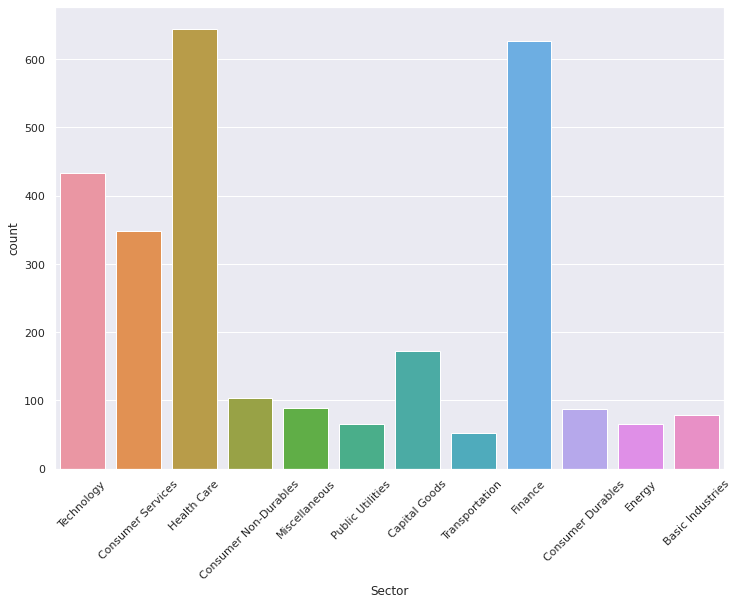

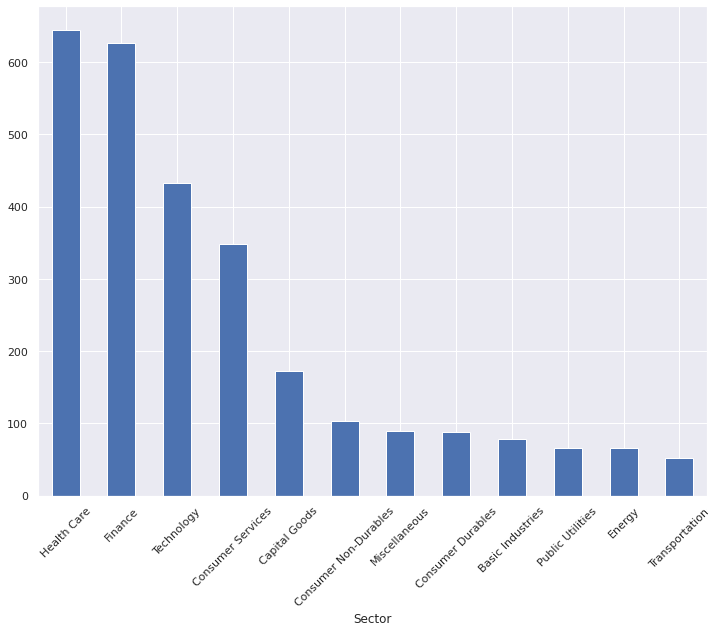

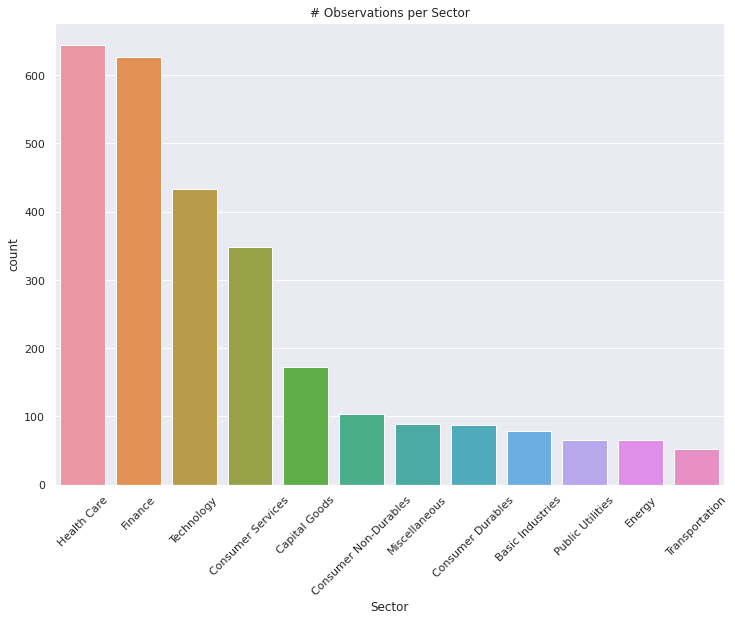

In [79]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8.5)})

nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')
nasdaq['Market Capitalization'] /= 1e6

sns.countplot(x='Sector', data=nasdaq)
plt.xticks(rotation=45)
plt.show()

nasdaq.groupby('Sector').size().sort_values(ascending=False).plot(kind='bar', figsize=(12, 9), rot=45)
plt.show()

order = nasdaq.groupby('Sector').size().sort_values(ascending=False).index.to_list()

sns.countplot(x='Sector', data=nasdaq, order=order)
plt.xticks(rotation=45)
plt.title('# Observations per Sector')
plt.show()

### **Seaborn countplot, multiple categories**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


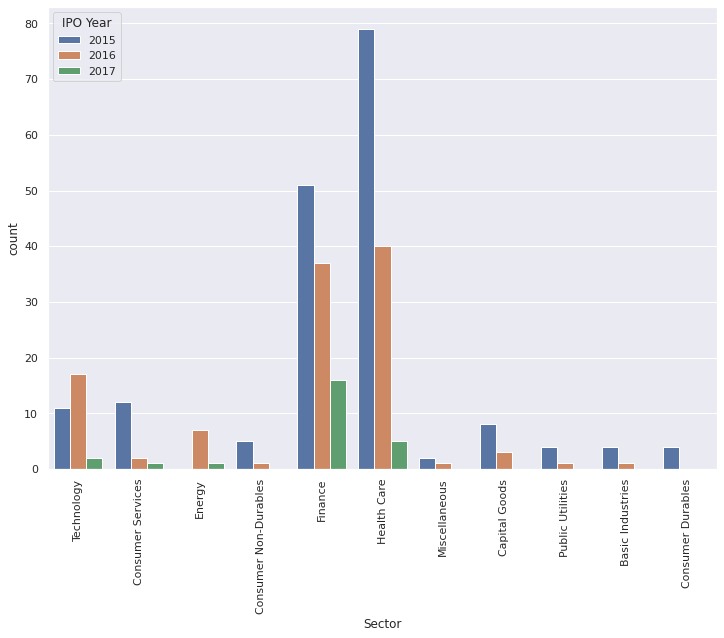

In [73]:
recent_ipos = nasdaq[nasdaq['IPO Year'] > 2014]
recent_ipos['IPO Year'] = recent_ipos['IPO Year'].astype(int)
sns.countplot(x='Sector', hue='IPO Year', data=recent_ipos)
plt.xticks(rotation=90)
plt.show() 

### **Compare stats with PointPlot**

* Average Market Capitalization by Sector and whether before or after 2000

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,IPO
0,AAPL,Apple Inc.,141.05,"740,024.47","1,980.00",Technology,Computer Manufacturing,Before 2000
2,GOOG,Alphabet Inc.,823.56,"569,426.12","2,004.00",Technology,"Computer Software: Programming, Data Processing",After 2000
3,MSFT,Microsoft Corporation,64.95,"501,903.06","1,986.00",Technology,Computer Software: Prepackaged Software,Before 2000
4,AMZN,"Amazon.com, Inc.",884.67,"422,138.53","1,997.00",Consumer Services,Catalog/Specialty Distribution,Before 2000
5,FB,"Facebook, Inc.",139.39,"402,834.50","2,012.00",Technology,"Computer Software: Programming, Data Processing",After 2000


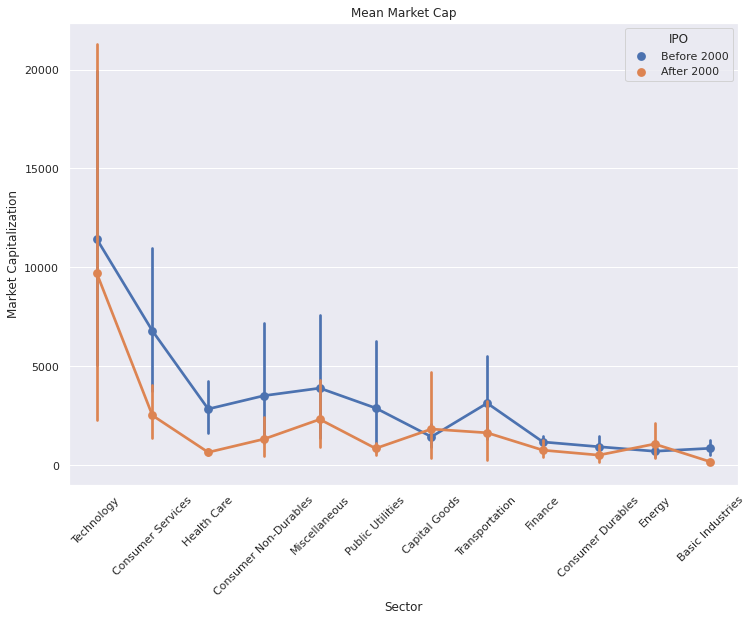

In [81]:
nasdaq['IPO'] = nasdaq['IPO Year'].apply(lambda x: 'After 2000' if x > 2000 else 'Before 2000')

display(nasdaq.drop(1).head())

sns.pointplot(x='Sector', y='Market Capitalization', hue='IPO', data=nasdaq)
plt.xticks(rotation=45) 
plt.title('Mean Market Cap')
plt.show()

Market Capitalization is higher for older companies (before 2000), but not all cases.

### **Plot IPO timeline for all exchanges using `countplot()`**

To create a basic visualization of <ins>the number of observations per category</ins> in a dataset, the `seaborn` `countplot()` function is usually the way to go:

```
seaborn.countplot(x=None, hue=None, data=None, ...)
```

The `x` parameter contains the names of the variables in the data argument, which is the DataFrame to be plotted. `hue` identifies an additional categorical variable with color. These are three optional parameters out of many accepted by the function; for a full list, check out the `seaborn` [documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html).


* Filter `listings` to only include `'IPO Year'`s after the year 2000.
* Convert the data in the column `'IPO Year'` to integers.
* Plot an `sns.countplot()` of `listings` using `'IPO Year'` as the `x` variable and `'Exchange'` for `hue`.
* Rotate the `xticks()` by `45` degrees and show the result.

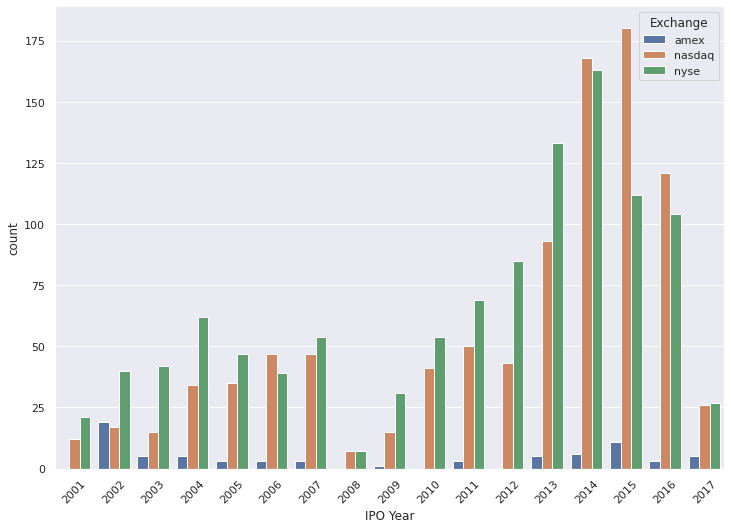

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

# Select IPOs after 2000
listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

### **Global median per capita income over time**

The `seaborn` `barplot()` function shows point estimates and confidence intervals as rectangular bars; <ins>the default function displays the `mean`</ins>, but it can also represent another summary statistic if you pass a particular numpy function to its estimator parameter:

```
seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)
```

In this exercise, you will use an imported World Bank dataset containing global income per capita data for 189 countries since the year 2000. To practice displaying summary statistics per category, you will plot and compare the median global income per capita since 2000 to the mean.

pandas as pd, numpy as np, matplotlib.pyplot as plt, and seaborn as sns have been imported. The global income data is available in your workspace in `income_trend`.

* Inspect `income_trend` using `.info()`.
* Create an `sns.barplot()` using the column `'Year'` for `x` and `'Income per Capita'` for `y`, and show the result after rotating the `xticks` by 45 degrees.
* Use `plt.close()` after the initial `plt.show()` to be able to show a second plot.
* Create a second `sns.barplot()` with the same `x` and `y` settings, using `estimator=np.median` to calculate the `median`, and show the result.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 0 to 2958
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            2959 non-null   object 
 1   Year               2959 non-null   int64  
 2   Income per Capita  2959 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 92.5+ KB


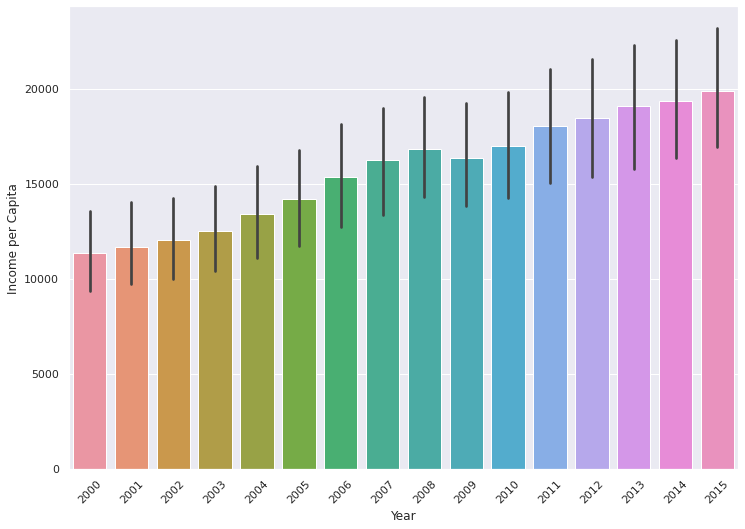

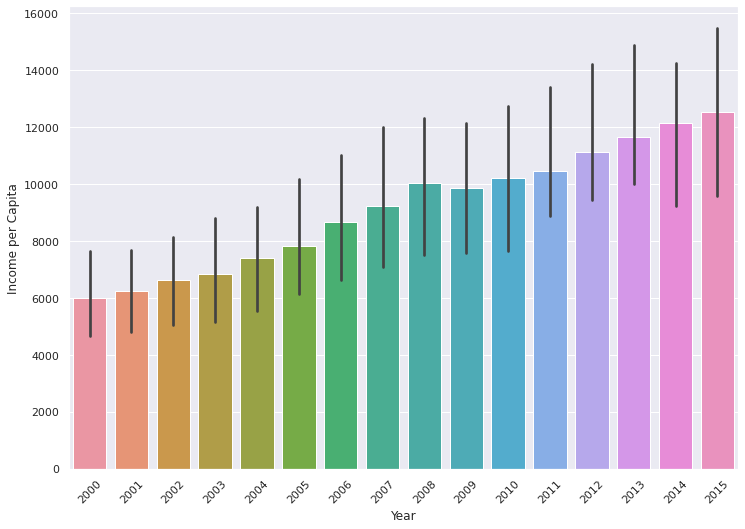

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

income_trend = pd.read_csv("income_trend.csv", index_col=[0])

# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

### **It turns out that `sns.barplot(x='Year', y='Income per Capita', data=income_trend)` can be generated using matplotlib as below**

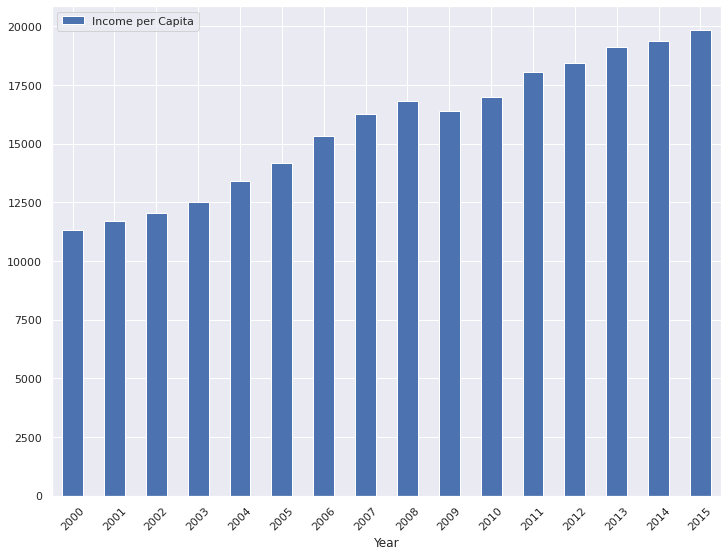

In [97]:
income_trend.groupby('Year').mean().plot(kind='bar', rot=45, figsize=(12, 9))
plt.show()

### **Calculate several metrics by sector and IPO year**

The seaborn `pointplot()` function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables:

```
seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)
```

Above, you saw a visualization for the `'Market Capitalization'` (the numerical variable) differentiated by whether the `'IPO Year'` (the categorical variable) occurred before (first level) or after (second level) the year 2000.

In this exercise, you will compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile. 

* Import `seaborn` as `sns`.
* Filter `listings` to have companies with IPOs after 2000 from all exchanges except the `'amex'`.
* Convert the data in column `'IPO Year'` to integers.
* Create the column `market_cap_m` to express market cap in USD million.
* Filter `market_cap_m` to exclude values above the 95th percentile.
* Create a `pointplot` of `listings` using the column `'IPO Year'` for `x`, `'market_cap_m'` for `y`, and `'Exchange'` for `hue`. Show the result after rotating the `xticks` by 45 degrees.

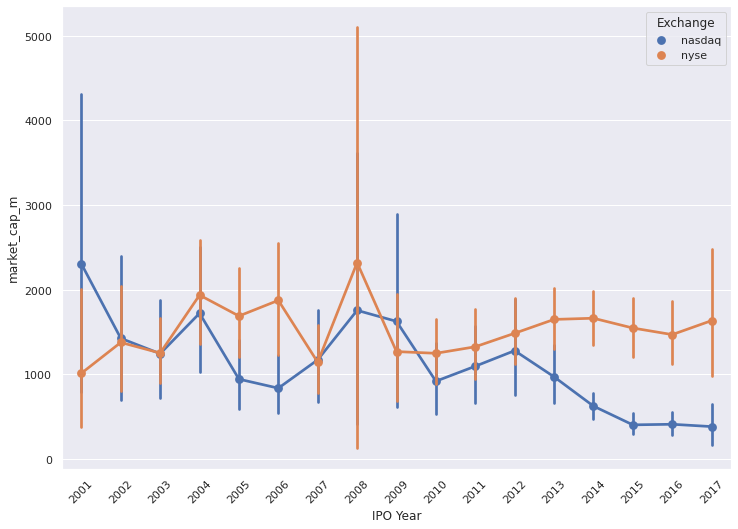

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
listings = pd.concat(listings)

import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# **Distributions by category**

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
nasdaq = nasdaq[nasdaq["market_cap_m"] > 0] # Active companies only
outliers = nasdaq["market_cap_m"].quantile(0.9) # Outlier threshold
nasdaq = nasdaq[nasdaq["market_cap_m"] < outliers] # Remove outliers



# **Boxplot: quartiles and outliers**

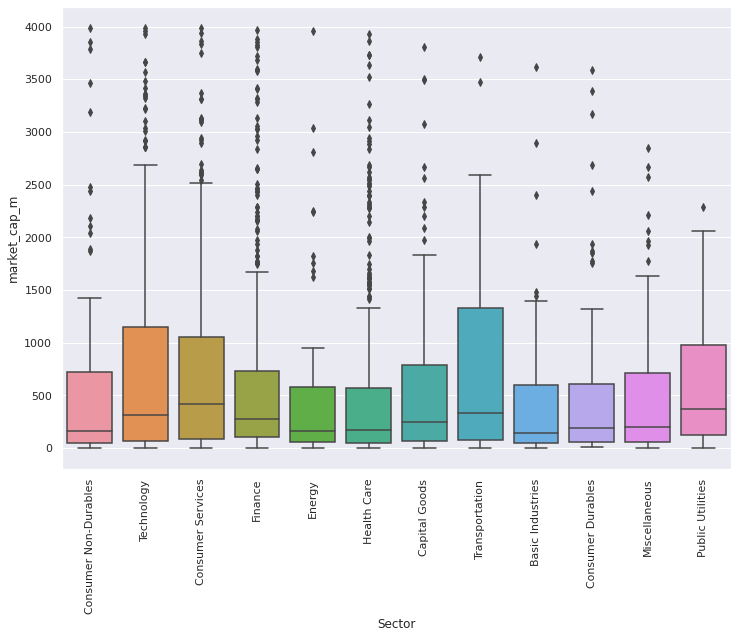

In [102]:
sns.boxplot(x='Sector', y='market_cap_m', data=nasdaq)
plt.xticks(rotation=90)
plt.show()

# **A variation: SwarmPlot**



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


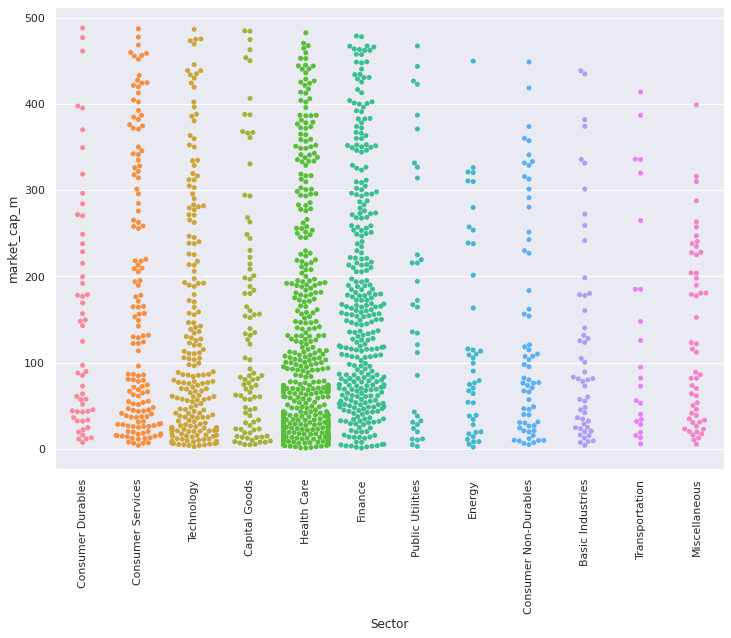

In [106]:
sns.swarmplot(x='Sector', y='market_cap_m', data=nasdaq)
plt.xticks(rotation=90)
plt.show()

### **Inflation trends in China, India, and the US**

Finally, the `seaborn` package includes functions that allow you to visualize the distribution of levels of categorical variables.

You will examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED. Before jumping into using the functions you have just learned, you should first familiarize yourself with the raw data. 

* Inspect `inflation` using `.info()`.
* Group `inflation` by `'Country'` and assign to `inflation_by_country`.
* In a `for` loop, iterate over `country`, `data` pairs returned by `inflation_by_country`. In each iteration, use `.plot()` on `data` with `title` set to `country` to show the historical time series.

## **Practice using DataReader().  Below are data quite close to those on DataCamp**.

In [154]:
from pandas_datareader.data import DataReader
from datetime import date

india = DataReader('CPALTT01INM659N', 'fred', date(1960, 1, 1), date(2020, 1, 1)).resample('YS').mean()
china = DataReader('CPALTT01CNM659N', 'fred', date(1960, 1, 1), date(2020, 1, 1)).resample('YS').mean()
usa   = DataReader('CPALTT01USA657N', 'fred', date(1960, 1, 1), date(2020, 1, 1))

india.columns=['Inflation']
china.columns=['Inflation']
usa.columns=['Inflation']

india['Country'] = 'India'
china['Country'] = 'China'
usa['Country'] = 'USA'

inflation = pd.concat([india, china, usa]).reindex(columns=["Country", "Inflation"])



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1960-01-01 to 2020-01-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    156 non-null    object 
 1   Inflation  156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


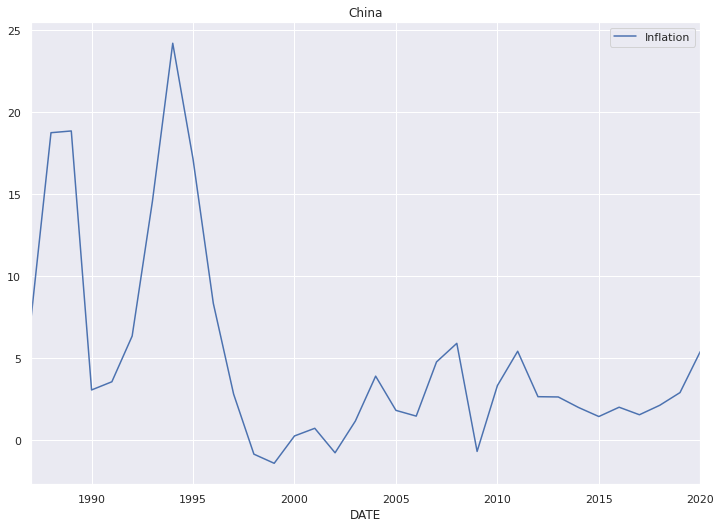

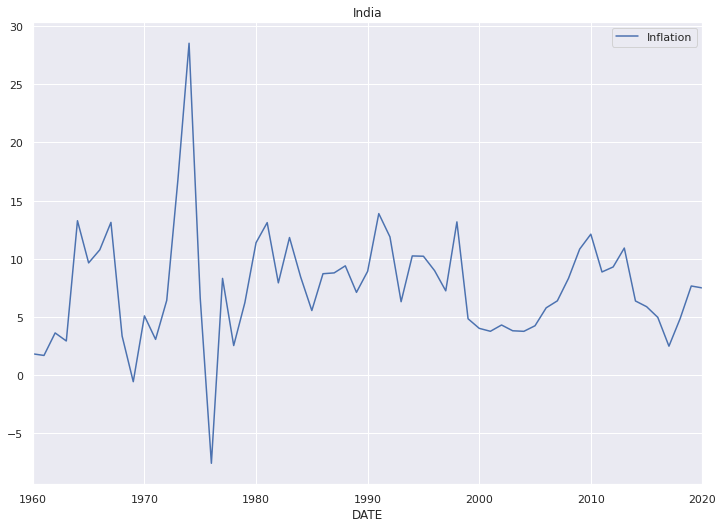

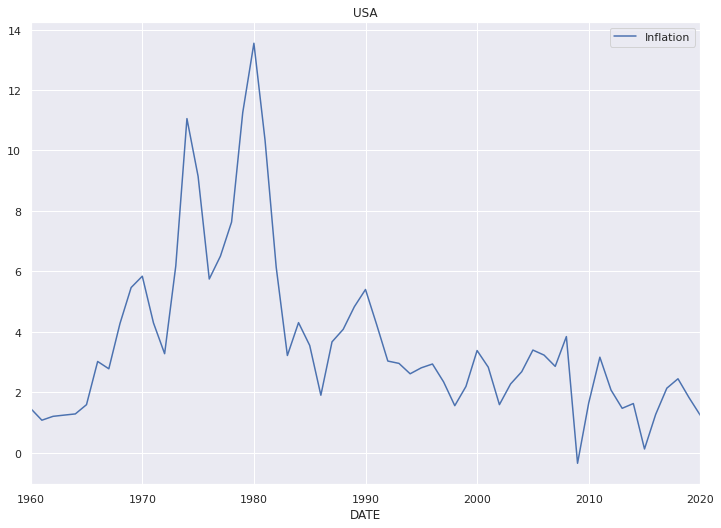

In [156]:
# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

### **Distribution of inflation rates in China, India, and the US**

The `boxplot()` function displays key quantiles of a distribution with respect to categories, where `y` represents a quantitative variable, and `x` a categorical variable. In statistics, this kind of distribution is known as a ***box-and-whisker plot***.

A complement to a box plot is a `swarmplot()`, which draws a categorical scatterplot that displays all categorical observations without overlapping; it takes similar arguments to `boxplot()`:

```
seaborn.boxplot(x=None, y=None, data=None, ...)
seaborn.swarmplot(x=None, y=None, data=None, ...)
```

You will compare the historical distributions of inflation rates by country - specifically China, India, and the US - instead of by time series trends. 

* Create and show a `boxplot` of the `inflation` data with `'Country'` for `x` and `'Inflation'` for `y`.
* Create and show `sns.swarmplot()` with the same arguments.

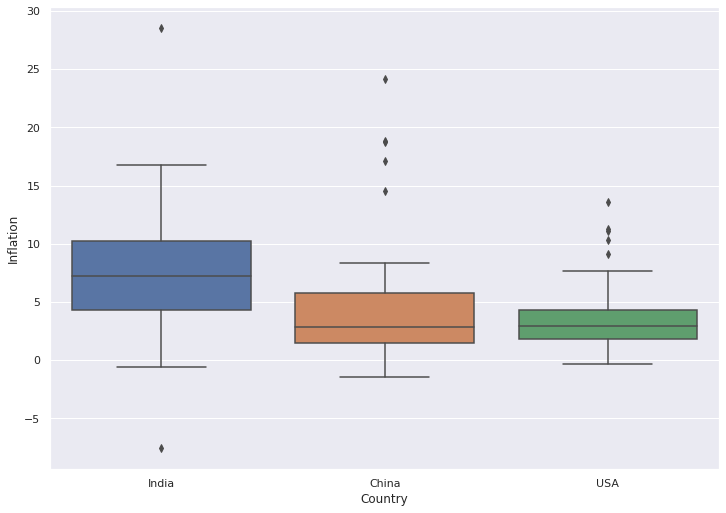

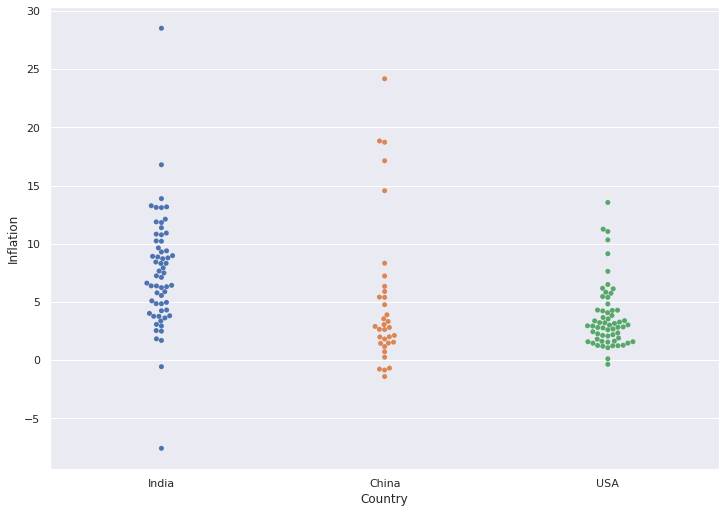

In [157]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()